In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy as sci
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_excel('World_development_mesurement.xlsx')
df

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage  \
0                        NaN               NaN       26998.0   
1                        NaN               NaN        7499.0   
2                        NaN               NaN        1983.0   
3                        NaN               NaN        1836.0   
4                        NaN               NaN           NaN   
...                      ...               ...           ...   
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health Exp % GDP Health Exp/Capita  ...  \
0         $54,790,058,957             0.035               $60  ...   
1          $9,129,594,819             0.034               $22  ...   
2          $2,359,122,303             0.043               $15  ...   
3          $5,788,311,645             0.047              $152  ...   
4          $2,610,959,139             0.051               $12  ...   
...                   ...               ...               ...  ...   
2699                  NaN               NaN               NaN  ...   
2700  $16,244,600,000,000             0.179            $8,895  ...   
2701      $50,004,354,667             0.089            $1,308  ...   
2702     $381,286,223,859             0.046              $593  ...   
2703                  NaN               NaN               NaN  ...   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
27

**Exploratory Data Analysis**

In [ ]:
df.shape

(2704, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [ ]:
df.describe()

Birth Rate  CO2 Emissions  Days to Start Business  Ease of Business  \
count  2585.000000   2.125000e+03             1718.000000        185.000000   
mean      0.022715   1.423071e+05               39.999418         94.875676   
std       0.011338   6.159288e+05               57.318588         54.791906   
min       0.007000   7.000000e+00                1.000000          1.000000   
25%       0.013000   1.360000e+03               13.000000         48.000000   
50%       0.020000   8.529000e+03               26.000000         94.000000   
75%       0.031000   5.910800e+04               45.000000        142.000000   
max       0.053000   8.286892e+06              694.000000        189.000000   

       Energy Usage  Health Exp % GDP  Hours to do Tax  Infant Mortality Rate  \
count  1.785000e+03       2395.000000      1416.000000            2444.000000   
mean   7.723684e+04          0.064170       302.068503               0.032813   
std    2.599239e+05          0.026325       273.299686               0.029968   
min    8.000000e+00          0.008000        12.000000               0.002000   
25%    3.737000e+03          0.046000       156.000000               0.009000   
50%    1.433800e+04          0.061000       239.000000               0.020000   
75%    4.185200e+04          0.079000       344.750000               0.053000   
max    2.727728e+06          0.225000      2600.000000               0.141000   

       Internet Usage  Lending Interest  Life Expectancy Female  \
count     2531.000000       1880.000000             2568.000000   
mean         0.239747          0.148103               71.159268   
std          0.260132          0.171829               10.708262   
min          0.000000          0.005000               39.000000   
25%          0.000000          0.080000               64.000000   
50%          0.100000          0.120000               75.000000   
75%          0.400000          0.173000               79.000000   
max          1.000000          4.965000               87.000000   

       Life Expectancy Male  Mobile Phone Usage  Number of Records  \
count           2568.000000         2537.000000             2704.0   
mean              66.461838            0.578124                1.0   
std                9.390217            0.474647                0.0   
min               37.000000            0.000000                1.0   
25%               61.000000            0.100000                1.0   
50%               69.000000            0.500000                1.0   
75%               73.250000            0.900000                1.0   
max               88.000000            2.900000                1.0   

       Population 0-14  Population 15-64  Population 65+  Population Total  \
count      2484.000000       2484.000000     2484.000000      2.704000e+03   
mean          0.303051          0.623481        0.073465      3.145729e+07   
std           0.106577          0.069660        0.049541      1.242894e+08   
min           0.118000          0.474000        0.003000      1.887600e+04   
25%           0.204750          0.559000        0.033000      8.783360e+05   
50%           0.299500          0.642500        0.052000      5.800324e+06   
75%           0.402000          0.676000        0.112000      2.014089e+07   
max           0.500000          0.858000        0.244000      1.350695e+09   

       Population Urban  
count       2678.000000  
mean           0.562953  
std            0.245897  
min            0.082000  
25%            0.356000  
50%            0.560000  
75%            0.765000  
max            1.000000

In [ ]:
df['GDP']=df['GDP'].str.replace(',','')
df['GDP']=df['GDP'].str.replace('$','')
df['GDP']=df['GDP'].astype(float)

In [ ]:
df['Business Tax Rate']=df['Business Tax Rate'].str.replace(',','')
df['Business Tax Rate']=df['Business Tax Rate'].str.replace('%','')
df['Business Tax Rate']=df['Business Tax Rate'].astype(float)

In [ ]:
df['Health Exp/Capita']=df['Health Exp/Capita'].str.replace(',','')
df['Health Exp/Capita']=df['Health Exp/Capita'].str.replace('$','')
df['Health Exp/Capita']=df['Health Exp/Capita'].astype(float)

In [ ]:
df['Tourism Inbound']=df['Tourism Inbound'].str.replace(',','')
df['Tourism Inbound']=df['Tourism Inbound'].str.replace('$','')
df['Tourism Inbound']=df['Tourism Inbound'].astype(float)

In [ ]:
df['Tourism Outbound']=df['Tourism Outbound'].str.replace(',','')
df['Tourism Outbound']=df['Tourism Outbound'].str.replace('$','')
df['Tourism Outbound']=df['Tourism Outbound'].astype(float)

In [ ]:
df

Birth Rate  Business Tax Rate  CO2 Emissions                   Country  \
0          0.020                NaN        87931.0                   Algeria   
1          0.050                NaN         9542.0                    Angola   
2          0.043                NaN         1617.0                     Benin   
3          0.027                NaN         4276.0                  Botswana   
4          0.046                NaN         1041.0              Burkina Faso   
...          ...                ...            ...                       ...   
2699         NaN                NaN            NaN  Turks and Caicos Islands   
2700       0.013               46.4            NaN             United States   
2701       0.015               41.9            NaN                   Uruguay   
2702       0.020               61.9            NaN             Venezuela, RB   
2703       0.011                NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                        NaN               NaN       26998.0  5.479006e+10   
1                        NaN               NaN        7499.0  9.129595e+09   
2                        NaN               NaN        1983.0  2.359122e+09   
3                        NaN               NaN        1836.0  5.788312e+09   
4                        NaN               NaN           NaN  2.610959e+09   
...                      ...               ...           ...           ...   
2699                     NaN               NaN           NaN           NaN   
2700                     5.0               4.0     2132446.0  1.624460e+13   
2701                     7.0              85.0           NaN  5.000435e+10   
2702                   144.0             180.0           NaN  3.812862e+11   
2703                     NaN               NaN           NaN           NaN   

      Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Male  \
0                0.035               60.0  ...                  67.0   
1                0.034               22.0  ...                  44.0   
2                0.043               15.0  ...                  53.0   
3                0.047              152.0  ...                  49.0   
4                0.051               12.0  ...                  49.0   
...                ...                ...  ...                   ...   
2699               NaN                NaN  ...                   NaN   
2700             0.179             8895.0  ...                  76.0   
2701             0.089             1308.0  ...                  74.0   
2702             0.046              593.0  ...                  72.0   
2703               NaN                NaN  ...                  76.0   

      Mobile Phone Usage  Number of Records  Population 0-14  \
0                    0.0                  1            0.342   
1                    0.0                  1            0.476   
2                    0.0                  1            0.454   
3                    0.1                  1            0.383   
4                    0.0                  1            0.468   
...                  ...                ...              ...   
2699                 NaN                  1              NaN   
2700                 1.0                  1            0.196   
2701                 1.5                  1            0.220   
2702                 1.0                  1            0.288   
2703                 NaN                  1            0.206   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0                0.619           0.039          31719449             0.599   
1                0.499           0.025          13924930             0.324   
2                0.517           0.029           6949366             0.383   
3                0.587           0.029           1755375             0.532   
4                0.505           0.028          11607944             0.178   
...   

In [ ]:
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [ ]:
# dropping number of records column why because all are '1' values
df1=df.drop("Number of Records",axis=1)
df1

Birth Rate  Business Tax Rate  CO2 Emissions                   Country  \
0          0.020                NaN        87931.0                   Algeria   
1          0.050                NaN         9542.0                    Angola   
2          0.043                NaN         1617.0                     Benin   
3          0.027                NaN         4276.0                  Botswana   
4          0.046                NaN         1041.0              Burkina Faso   
...          ...                ...            ...                       ...   
2699         NaN                NaN            NaN  Turks and Caicos Islands   
2700       0.013               46.4            NaN             United States   
2701       0.015               41.9            NaN                   Uruguay   
2702       0.020               61.9            NaN             Venezuela, RB   
2703       0.011                NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                        NaN               NaN       26998.0  5.479006e+10   
1                        NaN               NaN        7499.0  9.129595e+09   
2                        NaN               NaN        1983.0  2.359122e+09   
3                        NaN               NaN        1836.0  5.788312e+09   
4                        NaN               NaN           NaN  2.610959e+09   
...                      ...               ...           ...           ...   
2699                     NaN               NaN           NaN           NaN   
2700                     5.0               4.0     2132446.0  1.624460e+13   
2701                     7.0              85.0           NaN  5.000435e+10   
2702                   144.0             180.0           NaN  3.812862e+11   
2703                     NaN               NaN           NaN           NaN   

      Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Female  \
0                0.035               60.0  ...                    71.0   
1                0.034               22.0  ...                    47.0   
2                0.043               15.0  ...                    57.0   
3                0.047              152.0  ...                    52.0   
4                0.051               12.0  ...                    52.0   
...                ...                ...  ...                     ...   
2699               NaN                NaN  ...                     NaN   
2700             0.179             8895.0  ...                    81.0   
2701             0.089             1308.0  ...                    80.0   
2702             0.046              593.0  ...                    78.0   
2703               NaN                NaN  ...                    83.0   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                     67.0                 0.0            0.342   
1                     44.0                 0.0            0.476   
2                     53.0                 0.0            0.454   
3                     49.0                 0.1            0.383   
4                     49.0                 0.0            0.468   
...                    ...                 ...              ...   
2699                   NaN                 NaN              NaN   
2700                  76.0                 1.0            0.196   
2701                  74.0                 1.5            0.220   
2702                  72.0                 1.0            0.288   
2703                  76.0                 NaN            0.206   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0                0.619           0.039          31719449             0.599   
1                0.499           0.025          13924930             0.324   
2                0.517           0.029           6949366             0.383   
3                0.587           0.029           1755375             0.532   
4                0.505  

In [ ]:
df1[df1.duplicated()].shape

(0, 24)

In [ ]:
df1[df1.duplicated()]

Empty DataFrame
Columns: [Birth Rate, Business Tax Rate, CO2 Emissions, Country, Days to Start Business, Ease of Business, Energy Usage, GDP, Health Exp % GDP, Health Exp/Capita, Hours to do Tax, Infant Mortality Rate, Internet Usage, Lending Interest, Life Expectancy Female, Life Expectancy Male, Mobile Phone Usage, Population 0-14, Population 15-64, Population 65+, Population Total, Population Urban, Tourism Inbound, Tourism Outbound]
Index: []

[0 rows x 24 columns]

In [ ]:
df2=df1.drop("Country",axis=1)
df2

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0          0.020                NaN        87931.0                     NaN   
1          0.050                NaN         9542.0                     NaN   
2          0.043                NaN         1617.0                     NaN   
3          0.027                NaN         4276.0                     NaN   
4          0.046                NaN         1041.0                     NaN   
...          ...                ...            ...                     ...   
2699         NaN                NaN            NaN                     NaN   
2700       0.013               46.4            NaN                     5.0   
2701       0.015               41.9            NaN                     7.0   
2702       0.020               61.9            NaN                   144.0   
2703       0.011                NaN            NaN                     NaN   

      Ease of Business  Energy Usage           GDP  Health Exp % GDP  \
0                  NaN       26998.0  5.479006e+10             0.035   
1                  NaN        7499.0  9.129595e+09             0.034   
2                  NaN        1983.0  2.359122e+09             0.043   
3                  NaN        1836.0  5.788312e+09             0.047   
4                  NaN           NaN  2.610959e+09             0.051   
...                ...           ...           ...               ...   
2699               NaN           NaN           NaN               NaN   
2700               4.0     2132446.0  1.624460e+13             0.179   
2701              85.0           NaN  5.000435e+10             0.089   
2702             180.0           NaN  3.812862e+11             0.046   
2703               NaN           NaN           NaN               NaN   

      Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Female  \
0                  60.0              NaN  ...                    71.0   
1                  22.0              NaN  ...                    47.0   
2                  15.0              NaN  ...                    57.0   
3                 152.0              NaN  ...                    52.0   
4                  12.0              NaN  ...                    52.0   
...                 ...              ...  ...                     ...   
2699                NaN              NaN  ...                     NaN   
2700             8895.0            175.0  ...                    81.0   
2701             1308.0            310.0  ...                    80.0   
2702              593.0            792.0  ...                    78.0   
2703                NaN              NaN  ...                    83.0   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                     67.0                 0.0            0.342   
1                     44.0                 0.0            0.476   
2                     53.0                 0.0            0.454   
3                     49.0                 0.1            0.383   
4                     49.0                 0.0            0.468   
...                    ...                 ...              ...   
2699                   NaN                 NaN              NaN   
2700                  76.0                 1.0            0.196   
2701                  74.0                 1.5            0.220   
2702                  72.0                 1.0            0.288   
2703                  76.0                 NaN            0.206   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0                0.619           0.039          31719449             0.599   
1                0.499           0.025          13924930             0.324   
2                0.517           0.029           6949366             0.383   
3                0.587           0.029           1755375             0.532   
4                0.505           0.028          11607944             0.178   
...                ...             ...               .

In [ ]:
# copying data
df3=df2

In [ ]:
# imputation of null values by KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)
imputed_df = pd.DataFrame(knn_imputer.fit_transform(df2),columns=df2.columns)
imputed_df.head()

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0       0.020              50.96        87931.0                    29.6   
1       0.050              43.82         9542.0                    30.4   
2       0.043              45.18         1617.0                    58.2   
3       0.027              38.16         4276.0                    47.0   
4       0.046              88.26         1041.0                    32.4   

   Ease of Business  Energy Usage           GDP  Health Exp % GDP  \
0             130.4       26998.0  5.479006e+10             0.035   
1             120.4        7499.0  9.129595e+09             0.034   
2             149.4        1983.0  2.359122e+09             0.043   
3             149.4        1836.0  5.788312e+09             0.047   
4             134.6       16080.6  2.610959e+09             0.051   

   Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Female  \
0               60.0            335.4  ...                    71.0   
1               22.0            229.8  ...                    47.0   
2               15.0            230.6  ...                    57.0   
3              152.0            208.4  ...                    52.0   
4               12.0            259.4  ...                    52.0   

   Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                  67.0                 0.0            0.342   
1                  44.0                 0.0            0.476   
2                  53.0                 0.0            0.454   
3                  49.0                 0.1            0.383   
4                  49.0                 0.0            0.468   

   Population 15-64  Population 65+  Population Total  Population Urban  \
0             0.619           0.039        31719449.0             0.599   
1             0.499           0.025        13924930.0             0.324   
2             0.517           0.029         6949366.0             0.383   
3             0.587           0.029         1755375.0             0.532   
4             0.505           0.028        11607944.0             0.178   

   Tourism Inbound  Tourism Outbound  
0      102000000.0       193000000.0  
1       34000000.0       146000000.0  
2       77000000.0        50000000.0  
3      227000000.0       209000000.0  
4       23000000.0        30000000.0  

[5 rows x 23 columns]

In [ ]:
df3['Birth Rate']=df3['Birth Rate'].fillna(df3['Birth Rate'].mean())
df3['Business Tax Rate']=df3['Business Tax Rate'].fillna(df3['Business Tax Rate'].mean())
df3['CO2 Emissions']=df3['CO2 Emissions'].fillna(df3['CO2 Emissions'].mean())
df3['Days to Start Business']=df3['Days to Start Business'].fillna(df3['Days to Start Business'].mean())
df3['Ease of Business']=df3['Ease of Business'].fillna(df3['Ease of Business'].mean())
df3['Energy Usage']=df3['Energy Usage'].fillna(df3['Energy Usage'].mean())
df3['GDP']=df3['GDP'].fillna(df3['GDP'].mean())
df3['Health Exp % GDP']=df3['Health Exp % GDP'].fillna(df3['Health Exp % GDP'].mean())
df3['Health Exp/Capita']=df3['Health Exp/Capita'].fillna(df3['Health Exp/Capita'].mean())
df3['Hours to do Tax']=df3['Hours to do Tax'].fillna(df3['Hours to do Tax'].mean())
df3['Infant Mortality Rate']=df3['Infant Mortality Rate'].fillna(df3['Infant Mortality Rate'].mean())
df3['Internet Usage']=df3['Internet Usage'].fillna(df3['Internet Usage'].mean())
df3['Lending Interest']=df3['Lending Interest'].fillna(df3['Lending Interest'].mean())
df3['Life Expectancy Female']=df3['Life Expectancy Female'].fillna(df3['Life Expectancy Female'].mean())
df3['Life Expectancy Male']=df3['Life Expectancy Male'].fillna(df3['Life Expectancy Male'].mean())
df3['Mobile Phone Usage']=df3['Mobile Phone Usage'].fillna(df3['Mobile Phone Usage'].mean())
df3['Population 0-14']=df3['Population 0-14'].fillna(df3['Population 0-14'].mean())
df3['Population 15-64']=df3['Population 15-64'].fillna(df3['Population 15-64'].mean())
df3['Population 65+']=df3['Population 65+'].fillna(df3['Population 65+'].mean())
df3['Population Total']=df3['Population Total'].fillna(df3['Population Total'].mean())
df3['Population Urban']=df3['Population Urban'].fillna(df3['Population Urban'].mean())
df3['Tourism Inbound']=df3['Tourism Inbound'].fillna(df3['Tourism Inbound'].mean())
df3['Tourism Outbound']=df3['Tourism Outbound'].fillna(df3['Tourism Outbound'].mean())
df3

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0       0.020000          48.966901   87931.000000               39.999418   
1       0.050000          48.966901    9542.000000               39.999418   
2       0.043000          48.966901    1617.000000               39.999418   
3       0.027000          48.966901    4276.000000               39.999418   
4       0.046000          48.966901    1041.000000               39.999418   
...          ...                ...            ...                     ...   
2699    0.022715          48.966901  142307.107765               39.999418   
2700    0.013000          46.400000  142307.107765                5.000000   
2701    0.015000          41.900000  142307.107765                7.000000   
2702    0.020000          61.900000  142307.107765              144.000000   
2703    0.011000          48.966901  142307.107765               39.999418   

      Ease of Business  Energy Usage           GDP  Health Exp % GDP  \
0            94.875676  2.699800e+04  5.479006e+10           0.03500   
1            94.875676  7.499000e+03  9.129595e+09           0.03400   
2            94.875676  1.983000e+03  2.359122e+09           0.04300   
3            94.875676  1.836000e+03  5.788312e+09           0.04700   
4            94.875676  7.723684e+04  2.610959e+09           0.05100   
...                ...           ...           ...               ...   
2699         94.875676  7.723684e+04  2.638540e+11           0.06417   
2700          4.000000  2.132446e+06  1.624460e+13           0.17900   
2701         85.000000  7.723684e+04  5.000435e+10           0.08900   
2702        180.000000  7.723684e+04  3.812862e+11           0.04600   
2703         94.875676  7.723684e+04  2.638540e+11           0.06417   

      Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Female  \
0             60.000000       302.068503  ...               71.000000   
1             22.000000       302.068503  ...               47.000000   
2             15.000000       302.068503  ...               57.000000   
3            152.000000       302.068503  ...               52.000000   
4             12.000000       302.068503  ...               52.000000   
...                 ...              ...  ...                     ...   
2699         801.397077       302.068503  ...               71.159268   
2700        8895.000000       175.000000  ...               81.000000   
2701        1308.000000       310.000000  ...               80.000000   
2702         593.000000       792.000000  ...               78.000000   
2703         801.397077       302.068503  ...               83.000000   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                67.000000            0.000000         0.342000   
1                44.000000            0.000000         0.476000   
2                53.000000            0.000000         0.454000   
3                49.000000            0.100000         0.383000   
4                49.000000            0.000000         0.468000   
...                    ...                 ...              ...   
2699             66.461838            0.578124         0.303051   
2700             76.000000            1.000000         0.196000   
2701             74.000000            1.500000         0.220000   
2702             72.000000            1.000000         0.288000   
2703             76.000000            0.578124         0.206000   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0             0.619000        0.039000          31719449             0.599   
1             0.499000        0.025000          13924930             0.324   
2             0.517000        0.029000           6949366             0.383   
3             0.587000        0.029000           1755375             0.532   
4             0.505000        0.028000          11607944             0.178   
...                ...             ...               .

In [ ]:
df3.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

In [ ]:
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [ ]:
df4=pd.concat([df["Country"], df3], axis=1)
df4

Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0                      Algeria    0.020000          48.966901   87931.000000   
1                       Angola    0.050000          48.966901    9542.000000   
2                        Benin    0.043000          48.966901    1617.000000   
3                     Botswana    0.027000          48.966901    4276.000000   
4                 Burkina Faso    0.046000          48.966901    1041.000000   
...                        ...         ...                ...            ...   
2699  Turks and Caicos Islands    0.022715          48.966901  142307.107765   
2700             United States    0.013000          46.400000  142307.107765   
2701                   Uruguay    0.015000          41.900000  142307.107765   
2702             Venezuela, RB    0.020000          61.900000  142307.107765   
2703     Virgin Islands (U.S.)    0.011000          48.966901  142307.107765   

      Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                  39.999418         94.875676  2.699800e+04  5.479006e+10   
1                  39.999418         94.875676  7.499000e+03  9.129595e+09   
2                  39.999418         94.875676  1.983000e+03  2.359122e+09   
3                  39.999418         94.875676  1.836000e+03  5.788312e+09   
4                  39.999418         94.875676  7.723684e+04  2.610959e+09   
...                      ...               ...           ...           ...   
2699               39.999418         94.875676  7.723684e+04  2.638540e+11   
2700                5.000000          4.000000  2.132446e+06  1.624460e+13   
2701                7.000000         85.000000  7.723684e+04  5.000435e+10   
2702              144.000000        180.000000  7.723684e+04  3.812862e+11   
2703               39.999418         94.875676  7.723684e+04  2.638540e+11   

      Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Female  \
0              0.03500          60.000000  ...               71.000000   
1              0.03400          22.000000  ...               47.000000   
2              0.04300          15.000000  ...               57.000000   
3              0.04700         152.000000  ...               52.000000   
4              0.05100          12.000000  ...               52.000000   
...                ...                ...  ...                     ...   
2699           0.06417         801.397077  ...               71.159268   
2700           0.17900        8895.000000  ...               81.000000   
2701           0.08900        1308.000000  ...               80.000000   
2702           0.04600         593.000000  ...               78.000000   
2703           0.06417         801.397077  ...               83.000000   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                67.000000            0.000000         0.342000   
1                44.000000            0.000000         0.476000   
2                53.000000            0.000000         0.454000   
3                49.000000            0.100000         0.383000   
4                49.000000            0.000000         0.468000   
...                    ...                 ...              ...   
2699             66.461838            0.578124         0.303051   
2700             76.000000            1.000000         0.196000   
2701             74.000000            1.500000         0.220000   
2702             72.000000            1.000000         0.288000   
2703             76.000000            0.578124         0.206000   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0             0.619000        0.039000          31719449             0.599   
1             0.499000        0.025000          13924930             0.324   
2             0.517000        0.029000           6949366             0.383   
3             0.587000        0.029000           1755375             0.532   
4             0.505000        0.028000   

In [ ]:
# Renaming columns
df4.rename(columns={'Birth Rate':'birth_rate', 'Business Tax Rate':'business_tax_rate','CO2 Emissions':'co2_emission','Country':'country',
                      'Days to Start Business':'days_to_start_business','Ease of Business':'ease_of_business','Energy Usage':'energy_usage',
                      'Gdp':'gdp','Health Exp % GDP':'health_exp_percent_GDP','Health Exp/Capita' :'health_exp_percapita',
                      'Hours to do Tax':'hours_to_do_tax','Infant Mortality Rate':'infant_mortality_rate','Internet Usage':'internet_usage',
                      'Lending Interest':'lending_interest','Life Expectancy Female':'life_expectancy_female','Life Expectancy Male':'life_expectancy_male',
                      'Mobile Phone Usage':'mobile_phone_usage','Number of Records':'no_of_records','Population 0-14':'population_0_14',
                      'Population 15-64':'population_15_64', 'Population 65+':'population_65_plus','Population Total':'population_total','Population Urban':'population_urban',
                      'Tourism Inbound':'tourism_inbound','Tourism Outbound':'tourism_outbound'}, inplace=True)
df4.head()

country  birth_rate  business_tax_rate  co2_emission  \
0       Algeria       0.020          48.966901       87931.0   
1        Angola       0.050          48.966901        9542.0   
2         Benin       0.043          48.966901        1617.0   
3      Botswana       0.027          48.966901        4276.0   
4  Burkina Faso       0.046          48.966901        1041.0   

   days_to_start_business  ease_of_business  energy_usage           GDP  \
0               39.999418         94.875676  26998.000000  5.479006e+10   
1               39.999418         94.875676   7499.000000  9.129595e+09   
2               39.999418         94.875676   1983.000000  2.359122e+09   
3               39.999418         94.875676   1836.000000  5.788312e+09   
4               39.999418         94.875676  77236.840896  2.610959e+09   

   health_exp_percent_GDP  health_exp_percapita  ...  life_expectancy_female  \
0                   0.035                  60.0  ...                    71.0   
1                   0.034                  22.0  ...                    47.0   
2                   0.043                  15.0  ...                    57.0   
3                   0.047                 152.0  ...                    52.0   
4                   0.051                  12.0  ...                    52.0   

   life_expectancy_male  mobile_phone_usage  population_0_14  \
0                  67.0                 0.0            0.342   
1                  44.0                 0.0            0.476   
2                  53.0                 0.0            0.454   
3                  49.0                 0.1            0.383   
4                  49.0                 0.0            0.468   

   population_15_64  population_65_plus  population_total  population_urban  \
0             0.619               0.039          31719449             0.599   
1             0.499               0.025          13924930             0.324   
2             0.517               0.029           6949366             0.383   
3             0.587               0.029           1755375             0.532   
4             0.505               0.028          11607944             0.178   

   tourism_inbound  tourism_outbound  
0      102000000.0       193000000.0  
1       34000000.0       146000000.0  
2       77000000.0        50000000.0  
3      227000000.0       209000000.0  
4       23000000.0        30000000.0  

[5 rows x 24 columns]

In [ ]:
# To check unique countries
len(df4["country"].unique())

208

In [ ]:
cou=df4["country"].unique()
cou

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Djibouti', 'Egypt, Arab Rep.', 'Equatorial Guinea', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland',
       'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe',
       'Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan',
       'Brunei Darussalam', 'Cambodia', 'China', 'Georgia',
       'Hong Kong SAR, China', 'India', 'Indonesia', 'Japan',
       'Kazakhstan', 'Korea, Dem. Rep.', 'Korea, Rep.', 

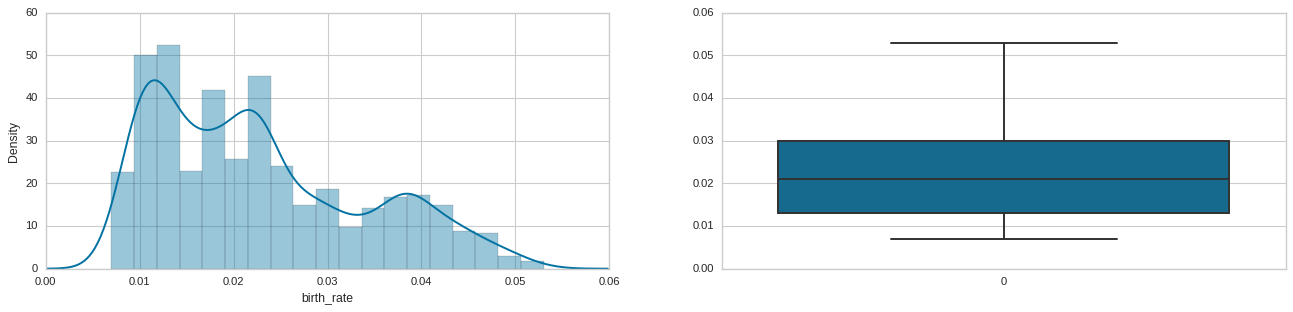

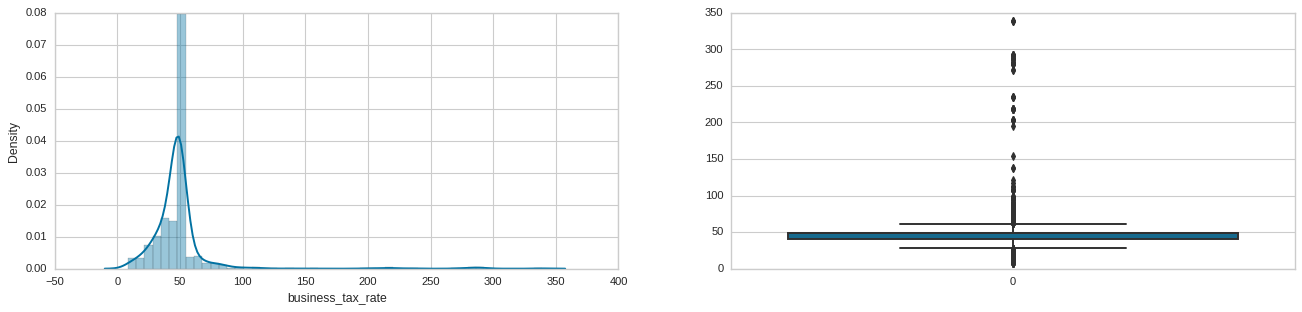

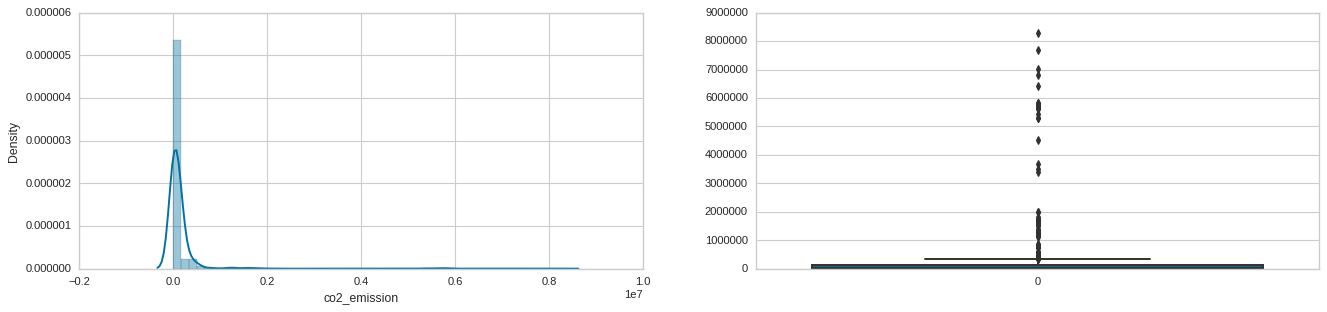

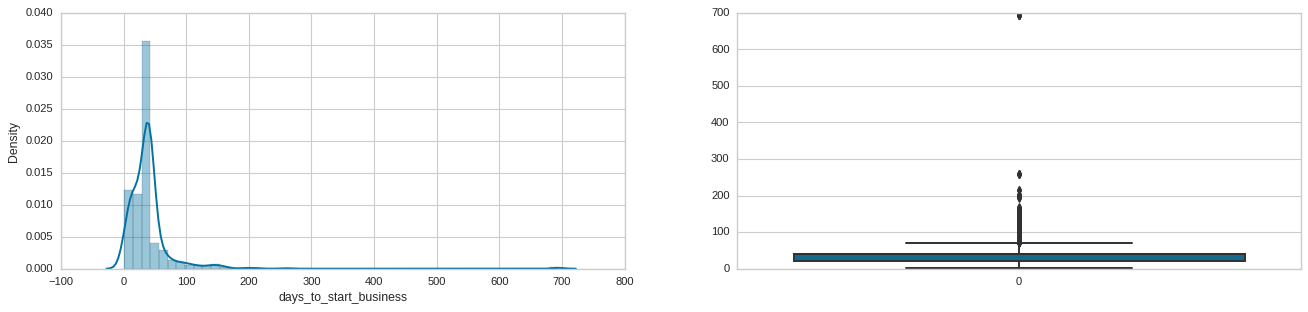

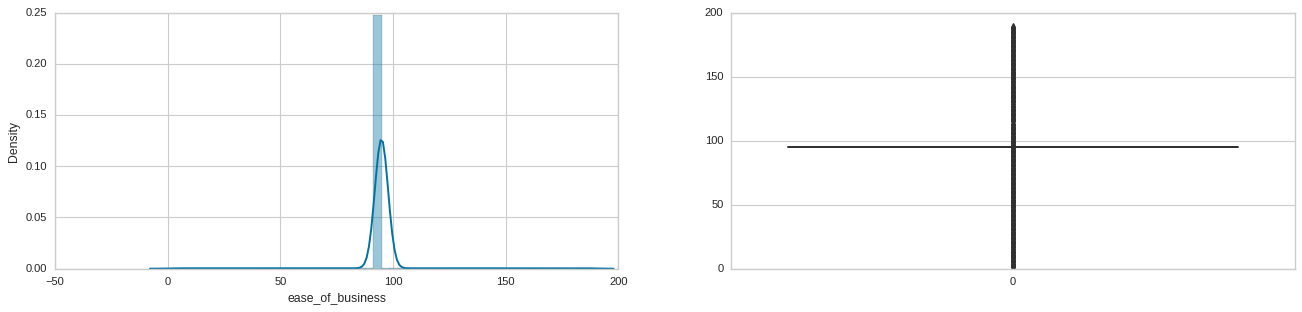

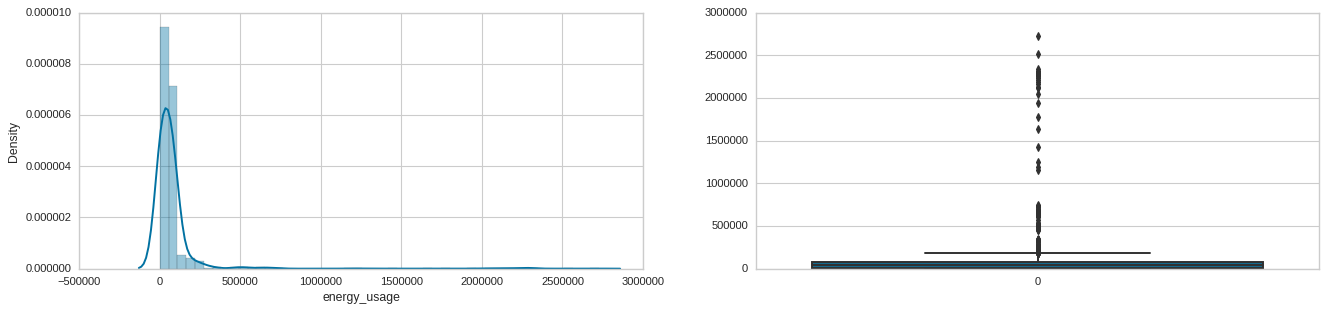

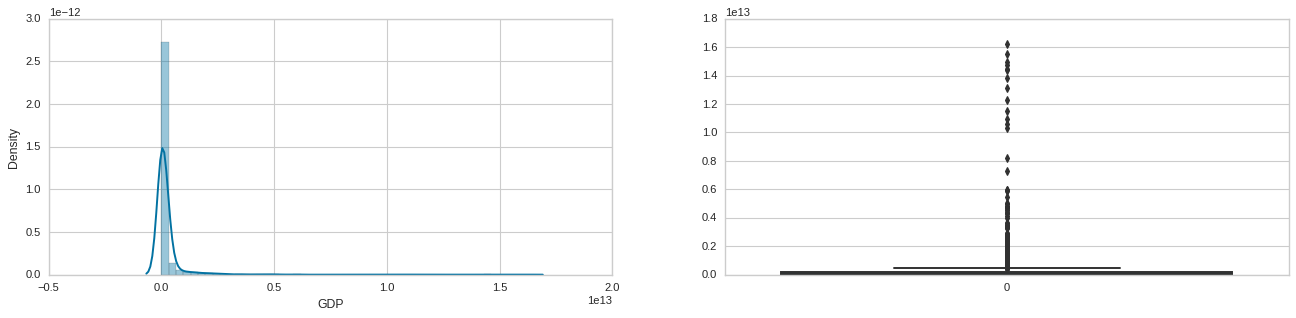

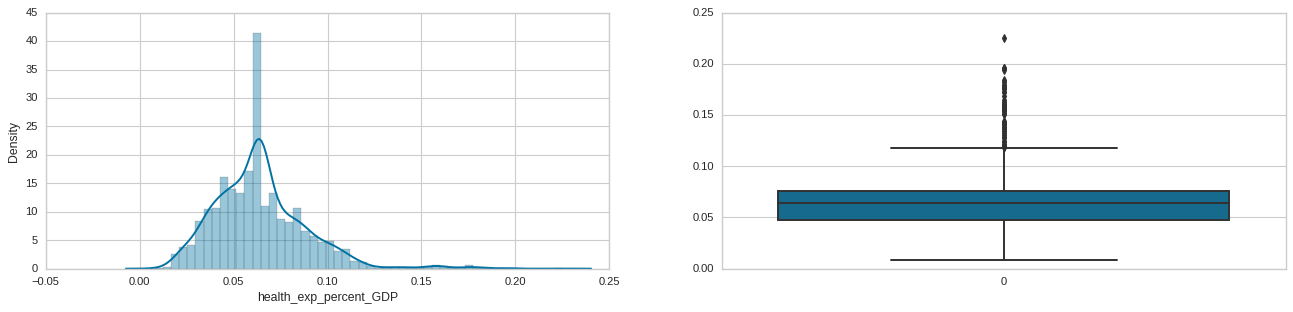

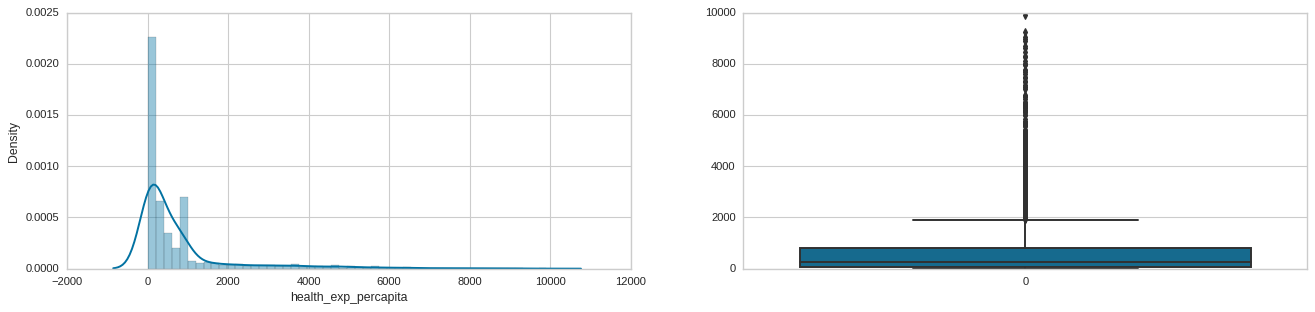

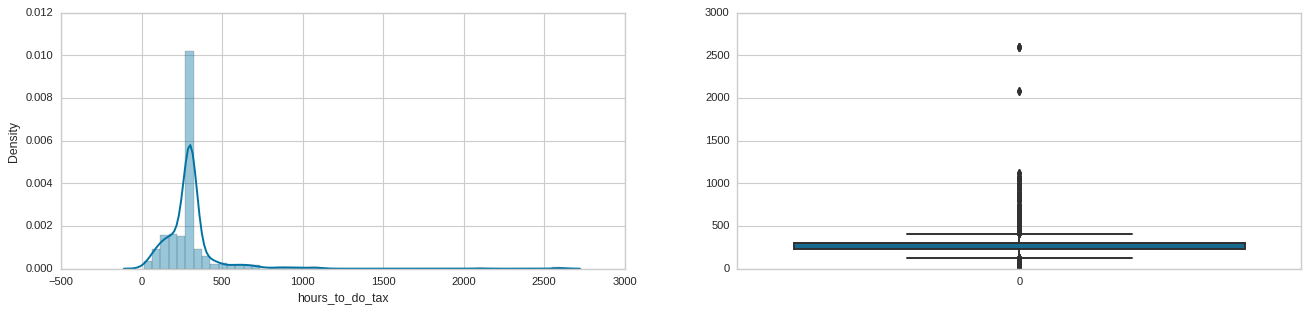

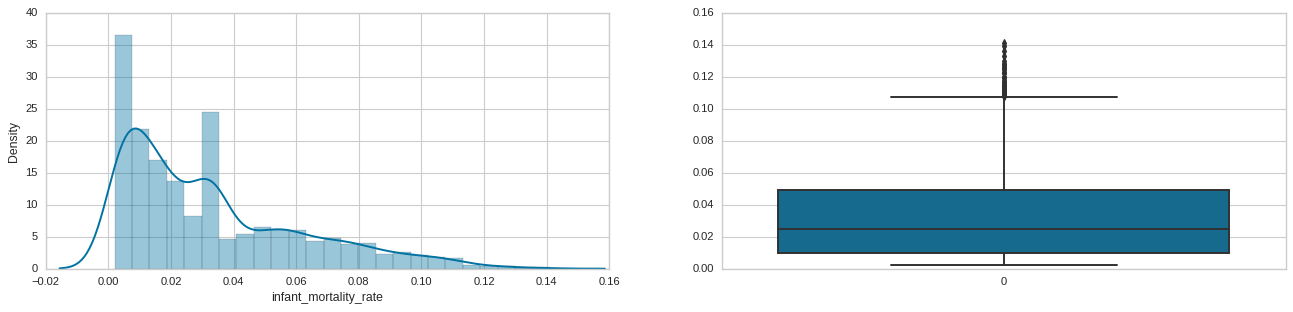

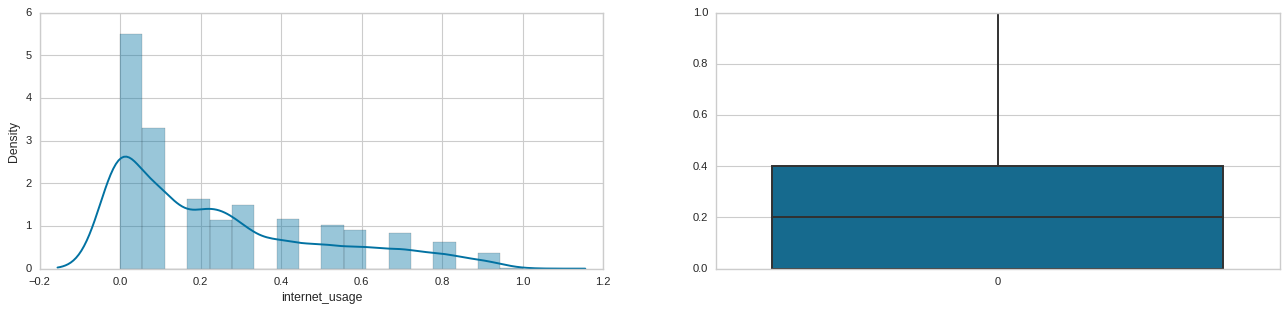

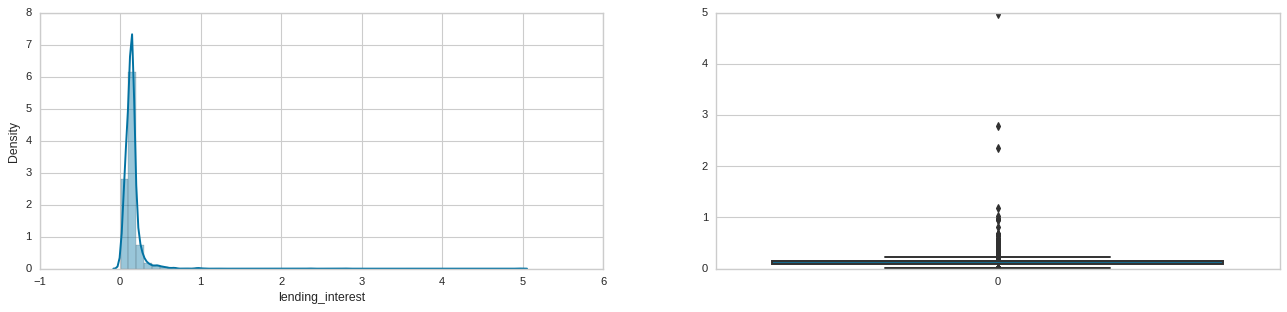

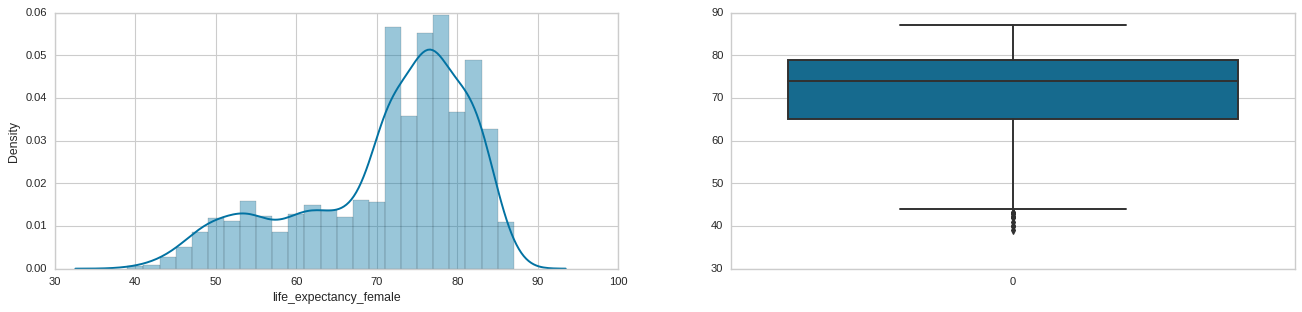

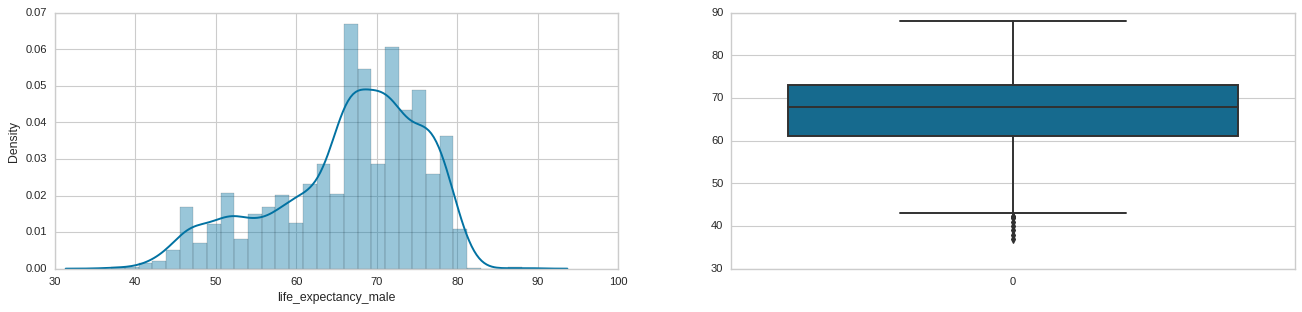

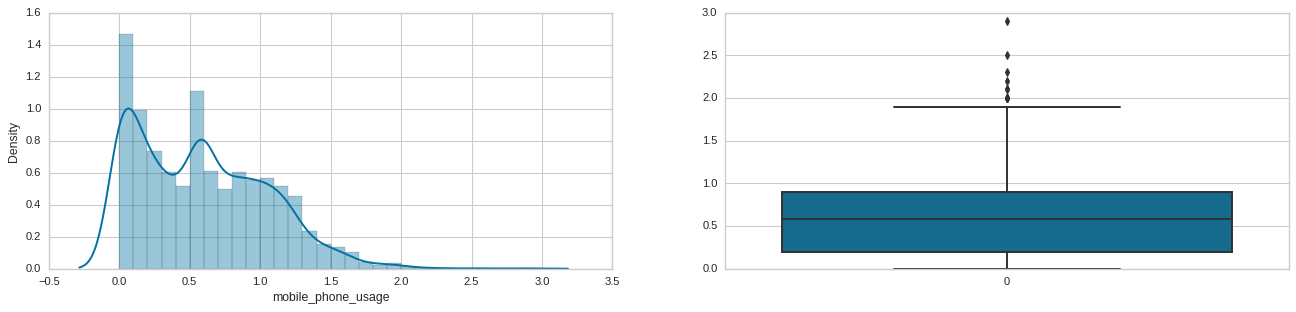

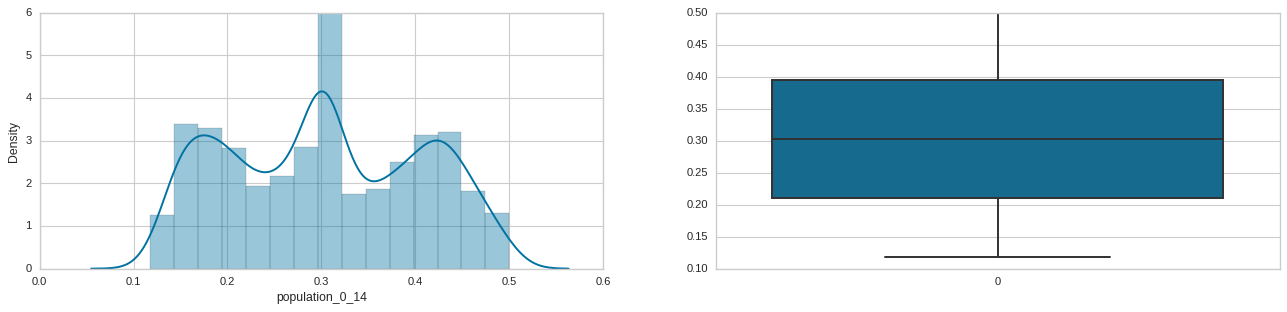

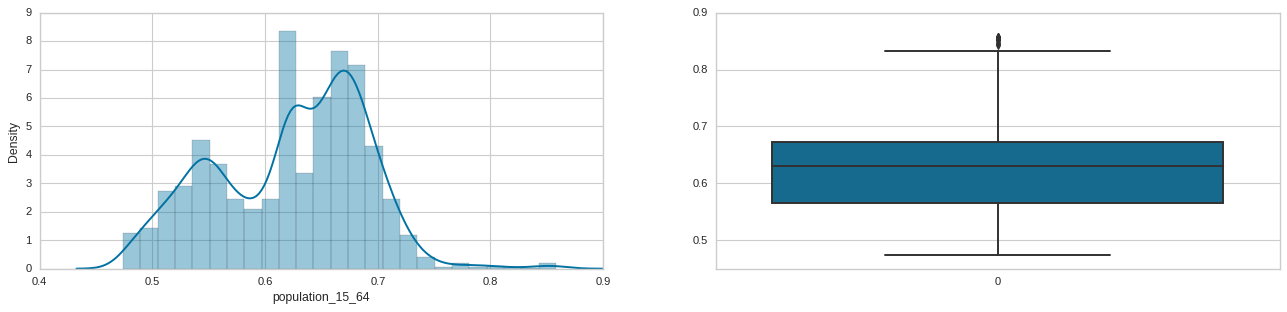

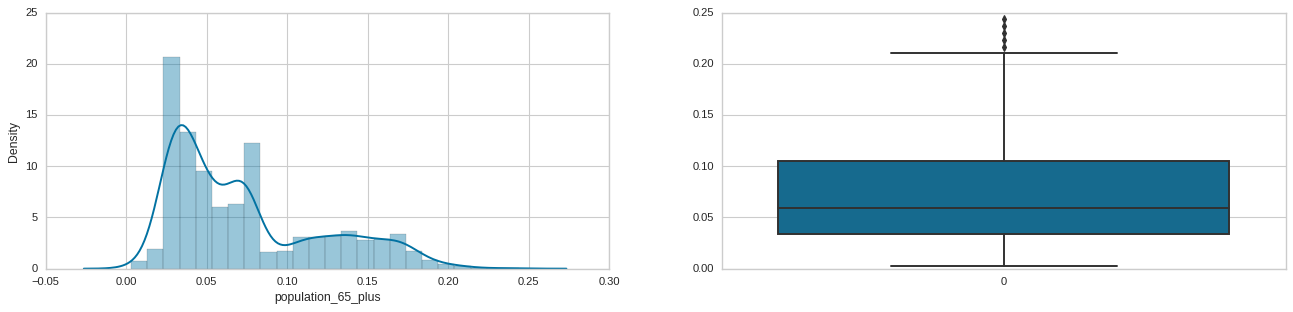

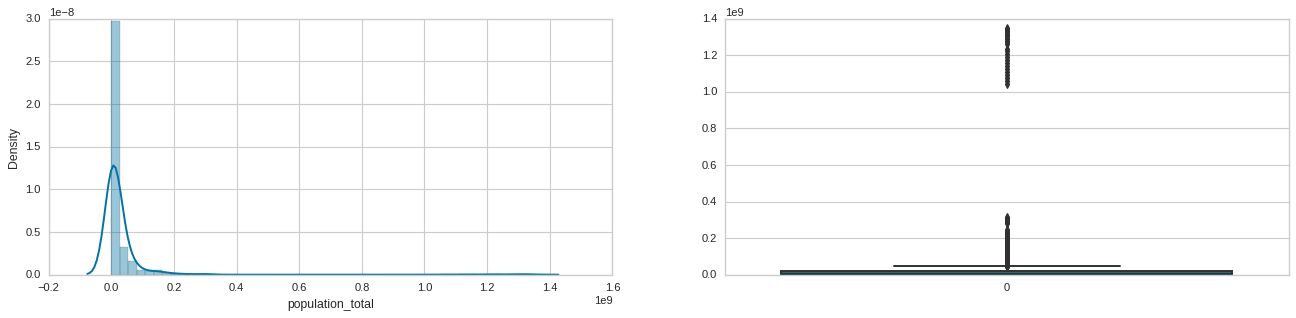

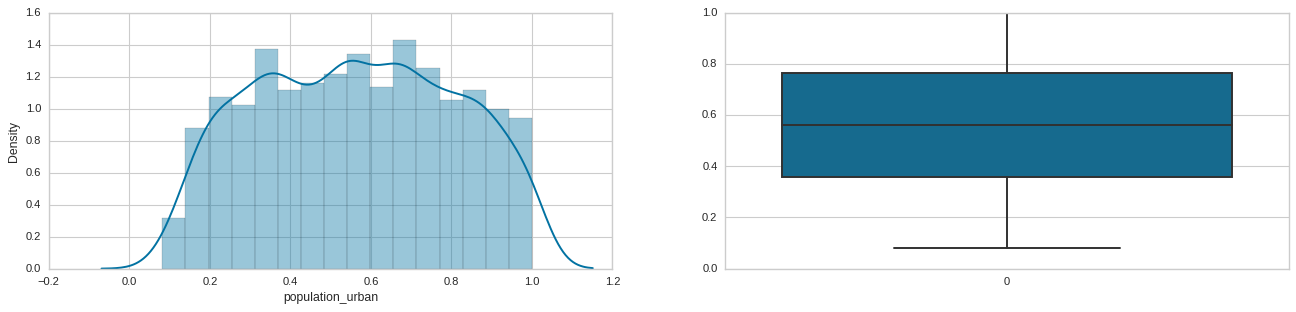

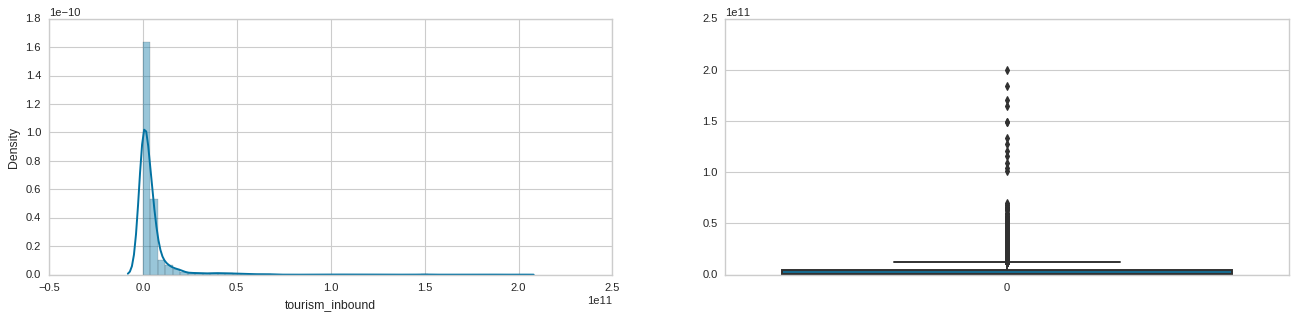

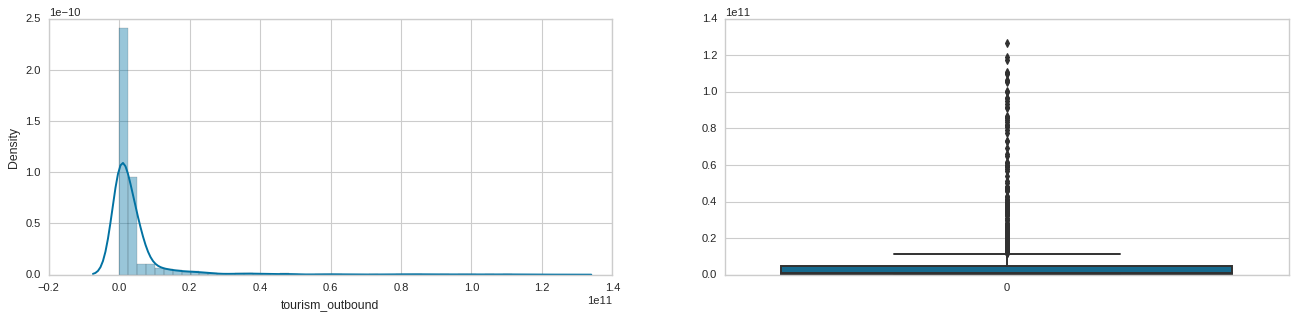

In [ ]:
def plot(x,**kwarge):
  fig, ax = plt.subplots(1, 2, figsize=(20,4))
  sns.distplot(x, ax=ax[0],kde=True)
  sns.boxplot(x, ax=ax[1])
  plt.show()
for i in df4.columns:
  if i!="country":
    plot(df4[i])
  else:
    continue

In [ ]:
df4.corr()

birth_rate  business_tax_rate  co2_emission  \
birth_rate                1.000000           0.208287 -1.593606e-01   
business_tax_rate         0.208287           1.000000  1.713800e-02   
co2_emission             -0.159361           0.017138  1.000000e+00   
days_to_start_business    0.135839           0.012806 -4.272465e-02   
ease_of_business          0.180585           0.089024 -6.226599e-19   
energy_usage             -0.125939           0.031657  9.036516e-01   
GDP                      -0.189939           0.005126  6.969807e-01   
health_exp_percent_GDP   -0.207529           0.027437  1.463550e-01   
health_exp_percapita     -0.430511          -0.093995  2.109556e-01   
hours_to_do_tax           0.050012           0.138325  5.940774e-02   
infant_mortality_rate     0.845714           0.233493 -1.242419e-01   
internet_usage           -0.628852          -0.158531  1.151223e-01   
lending_interest          0.225415           0.098655 -8.268118e-02   
life_expectancy_female   -0.860443          -0.205872  1.206077e-01   
life_expectancy_male     -0.818095          -0.225192  1.261064e-01   
mobile_phone_usage       -0.535911          -0.162713  4.554826e-02   
population_0_14           0.941336           0.166597 -1.783868e-01   
population_15_64         -0.899107          -0.195192  1.714674e-01   
population_65_plus       -0.761073          -0.084154  1.428229e-01   
population_total         -0.057766           0.046901  6.556544e-01   
population_urban         -0.584429          -0.085038  8.424609e-02   
tourism_inbound          -0.261777          -0.014983  5.942317e-01   
tourism_outbound         -0.263887          -0.018677  5.628569e-01   

                        days_to_start_business  ease_of_business  \
birth_rate                            0.135839      1.805854e-01   
business_tax_rate                     0.012806      8.902402e-02   
co2_emission                         -0.042725     -6.226599e-19   
days_to_start_business                1.000000      9.885052e-02   
ease_of_business                      0.098851      1.000000e+00   
energy_usage                         -0.045669     -2.808887e-02   
GDP                                  -0.073437     -7.985326e-02   
health_exp_percent_GDP               -0.124392     -7.855771e-02   
health_exp_percapita                 -0.163026     -1.863600e-01   
hours_to_do_tax                       0.142404      1.105322e-01   
infant_mortality_rate                 0.155002      1.593227e-01   
internet_usage                       -0.204076     -2.287469e-01   
lending_interest                      0.124615      4.398247e-02   
life_expectancy_female               -0.159822     -1.745835e-01   
life_expectancy_male                 -0.171361     -1.742410e-01   
mobile_phone_usage                   -0.158909     -1.326922e-01   
population_0_14                       0.170855      2.005074e-01   
population_15_64                     -0.137062     -1.706170e-01   
population_65_plus                   -0.174695     -1.915810e-01   
population_total                      0.001200      8.500546e-03   
population_urban                     -0.070101     -1.237170e-01   
tourism_inbound                      -0.111443     -1.141678e-01   
tourism_outbound                     -0.107485     -1.044914e-01   

                        energy_usage       GDP  health_exp_percent_GDP  \
birth_rate                 -0.125939 -0.189939               -0.207529   
business_tax_rate           0.031657  0.005126                0.027437   
co2_emission                0.903652  0.696981                0.146355   
days_to_start_business     -0.045669 -0.073437               -0.124392   
ease_of_business           -0.028089 -0.079853               -0.078558   
energy_usage                1.000000  0.842229                0.205554   
GDP                         0.842229  1.000000                0.325156   
health_exp_percent_GDP      0.205554  0.325156                1.000000   
health_exp_percapita

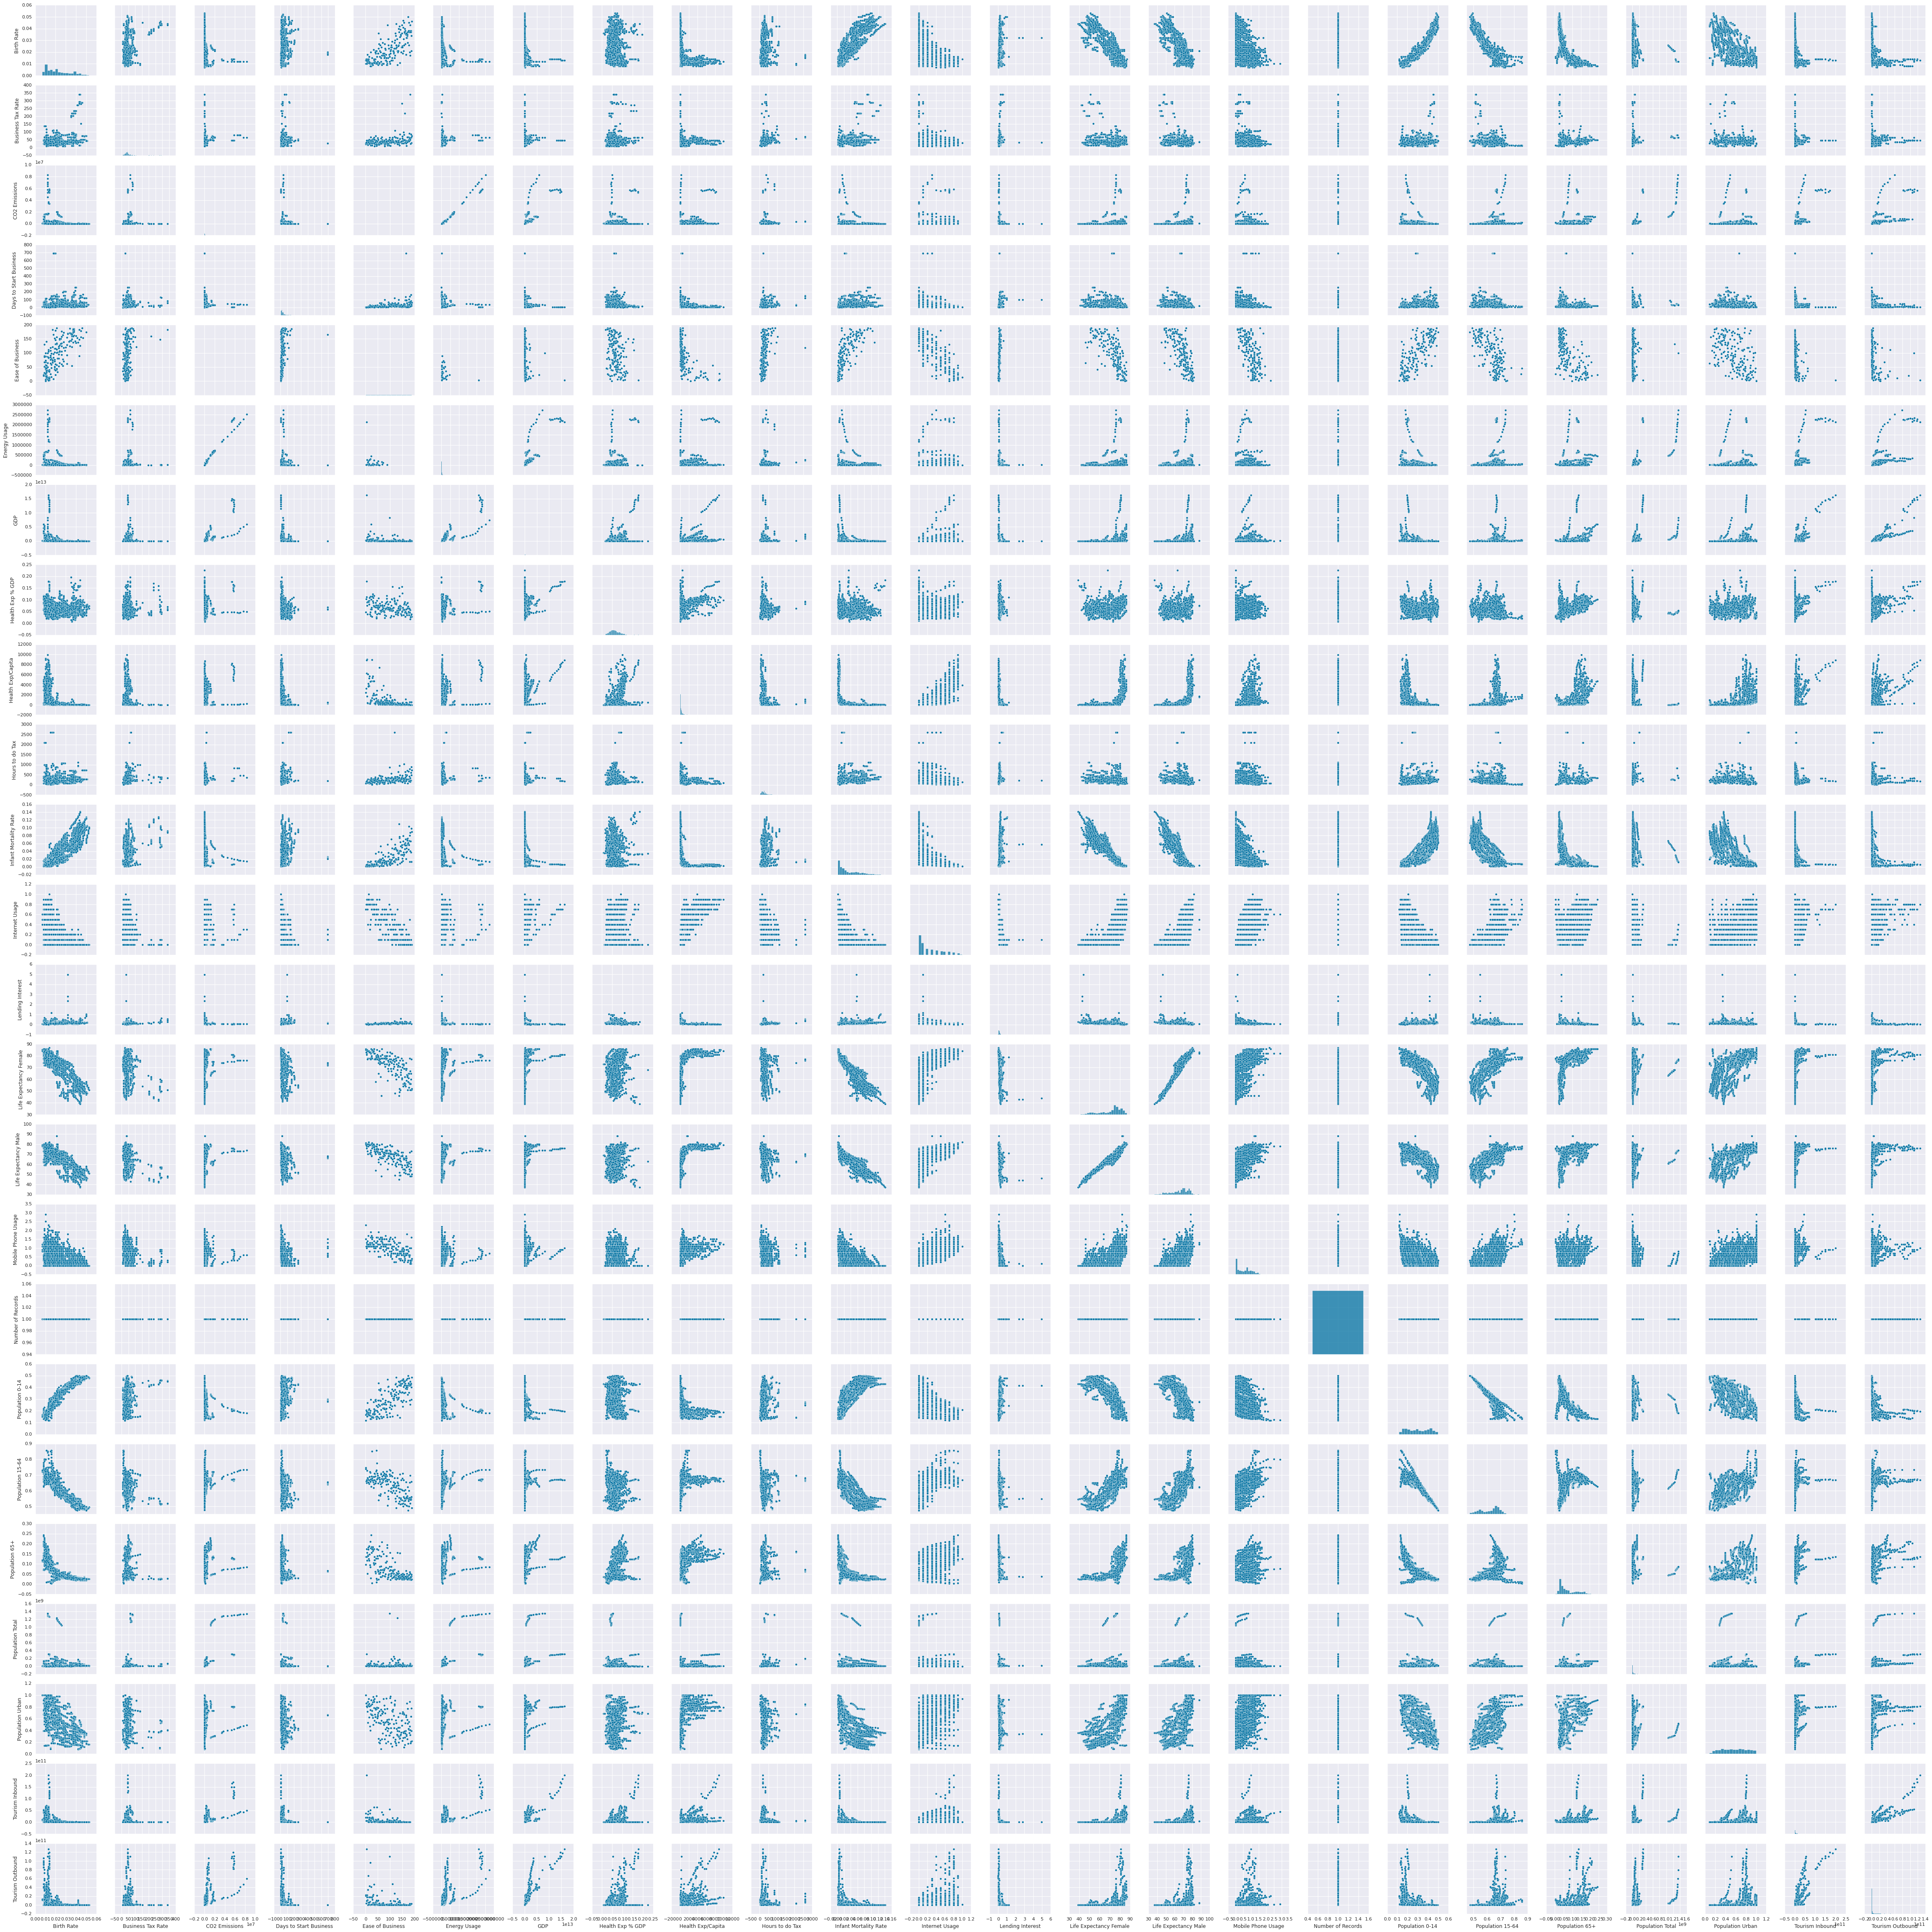

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

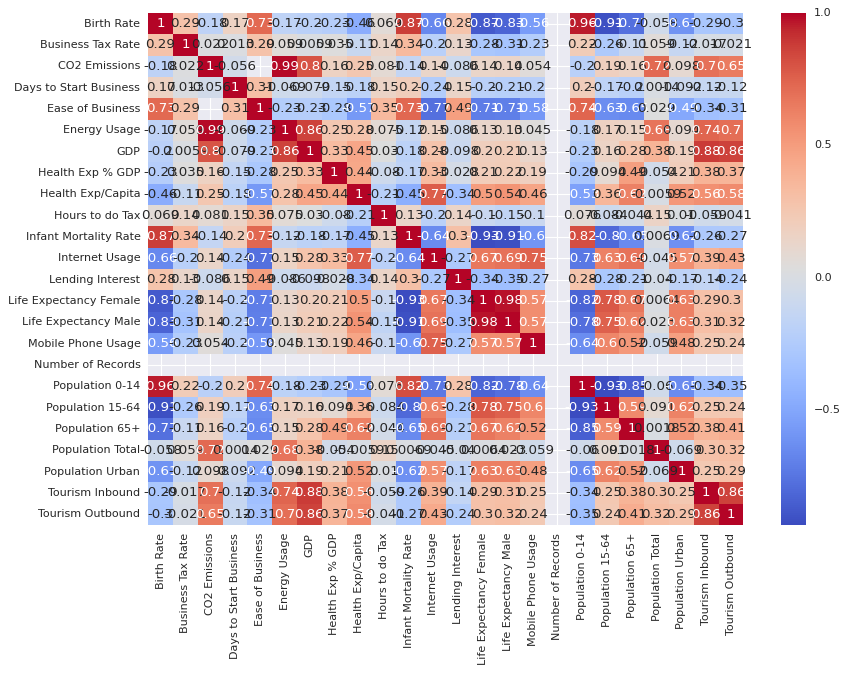

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')

**Feature Extraction**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
df_norm=pd.DataFrame(trans.fit_transform(df4.iloc[:,1:]))
df_norm

0         1         2         3         4         5         6   \
0     0.282609  0.123200  0.010610  0.056276  0.499339  0.009895  0.003369   
1     0.934783  0.123200  0.001151  0.056276  0.499339  0.002746  0.000558   
2     0.782609  0.123200  0.000194  0.056276  0.499339  0.000724  0.000141   
3     0.434783  0.123200  0.000515  0.056276  0.499339  0.000670  0.000352   
4     0.847826  0.123200  0.000125  0.056276  0.499339  0.028313  0.000157   
...        ...       ...       ...       ...       ...       ...       ...   
2699  0.341628  0.123200  0.017172  0.056276  0.499339  0.028313  0.016239   
2700  0.130435  0.115443  0.017172  0.005772  0.015957  0.781766  1.000000   
2701  0.173913  0.101843  0.017172  0.008658  0.446809  0.028313  0.003074   
2702  0.282609  0.162285  0.017172  0.206349  0.952128  0.028313  0.023468   
2703  0.086957  0.123200  0.017172  0.056276  0.499339  0.028313  0.016239   

            7         8         9   ...        13        14        15  \
0     0.124424  0.005855  0.112082  ...  0.666667  0.588235  0.000000   
1     0.119816  0.002019  0.112082  ...  0.166667  0.137255  0.000000   
2     0.161290  0.001312  0.112082  ...  0.375000  0.313725  0.000000   
3     0.179724  0.015142  0.112082  ...  0.270833  0.235294  0.034483   
4     0.198157  0.001009  0.112082  ...  0.270833  0.235294  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
2699  0.258846  0.080698  0.112082  ...  0.669985  0.577683  0.199353   
2700  0.788018  0.897739  0.062983  ...  0.875000  0.764706  0.344828   
2701  0.373272  0.131839  0.115147  ...  0.854167  0.725490  0.517241   
2702  0.175115  0.059661  0.301391  ...  0.812500  0.686275  0.344828   
2703  0.258846  0.080698  0.112082  ...  0.916667  0.764706  0.199353   

            16        17        18        19        20        21        22  
0     0.586387  0.377604  0.149378  0.023470  0.563181  0.000506  0.001523  
1     0.937173  0.065104  0.091286  0.010296  0.263617  0.000166  0.001152  
2     0.879581  0.111979  0.107884  0.005131  0.327887  0.000381  0.000393  
3     0.693717  0.294271  0.107884  0.001286  0.490196  0.001131  0.001650  
4     0.916230  0.080729  0.103734  0.008580  0.104575  0.000111  0.000235  
...        ...       ...       ...       ...       ...       ...       ...  
2699  0.484427  0.389275  0.292384  0.000010  0.903050  0.024682  0.037364  
2700  0.204188  0.502604  0.551867  0.232369  0.794118  1.000000  1.000000  
2701  0.267016  0.429688  0.568465  0.002500  0.943355  0.011101  0.008120  
2702  0.445026  0.463542  0.236515  0.022164  0.879085  0.004514  0.025296  
2703  0.230366  0.434896  0.618257  0.000064  0.944444  0.024682  0.037364  

[2704 rows x 23 columns]

In [ ]:
pca=PCA(n_components=2)
principal_components=pca.fit_transform(df_norm)
pca_df=pd.DataFrame(data=principal_components,columns=["PCA1","PCA2"])
pca_df

PCA1      PCA2
0     0.187850 -0.231982
1     1.260872  0.326445
2     0.941052  0.156832
3     0.602600  0.009492
4     1.127340  0.171464
...        ...       ...
2699 -0.122171  0.119101
2700 -1.069945  1.045015
2701 -0.680207  0.197247
2702 -0.361224  0.113378
2703 -0.620132  0.031968

[2704 rows x 2 columns]

In [ ]:
variance = pca.explained_variance_ratio_
variance

array([0.62940432, 0.07810209])

**Model Selection**

Hierarchical clustering

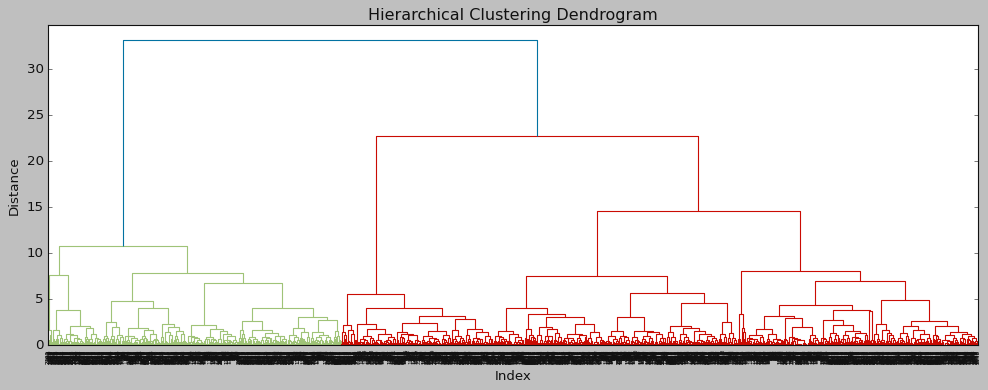

In [ ]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
#p = np.array(df_norm) # converting into numpy array format
z = linkage(df_norm, method="ward",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=6, linkage='ward',affinity = "euclidean").fit(df_norm)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df4['clust']=cluster_labels # creating a  new column and assigning it to new column
df4

country  birth_rate  business_tax_rate   co2_emission  \
0                      Algeria    0.020000          48.966901   87931.000000   
1                       Angola    0.050000          48.966901    9542.000000   
2                        Benin    0.043000          48.966901    1617.000000   
3                     Botswana    0.027000          48.966901    4276.000000   
4                 Burkina Faso    0.046000          48.966901    1041.000000   
...                        ...         ...                ...            ...   
2699  Turks and Caicos Islands    0.022715          48.966901  142307.107765   
2700             United States    0.013000          46.400000  142307.107765   
2701                   Uruguay    0.015000          41.900000  142307.107765   
2702             Venezuela, RB    0.020000          61.900000  142307.107765   
2703     Virgin Islands (U.S.)    0.011000          48.966901  142307.107765   

      days_to_start_business  ease_of_business  energy_usage           GDP  \
0                  39.999418         94.875676  2.699800e+04  5.479006e+10   
1                  39.999418         94.875676  7.499000e+03  9.129595e+09   
2                  39.999418         94.875676  1.983000e+03  2.359122e+09   
3                  39.999418         94.875676  1.836000e+03  5.788312e+09   
4                  39.999418         94.875676  7.723684e+04  2.610959e+09   
...                      ...               ...           ...           ...   
2699               39.999418         94.875676  7.723684e+04  2.638540e+11   
2700                5.000000          4.000000  2.132446e+06  1.624460e+13   
2701                7.000000         85.000000  7.723684e+04  5.000435e+10   
2702              144.000000        180.000000  7.723684e+04  3.812862e+11   
2703               39.999418         94.875676  7.723684e+04  2.638540e+11   

      health_exp_percent_GDP  health_exp_percapita  ...  life_expectancy_male  \
0                    0.03500             60.000000  ...             67.000000   
1                    0.03400             22.000000  ...             44.000000   
2                    0.04300             15.000000  ...             53.000000   
3                    0.04700            152.000000  ...             49.000000   
4                    0.05100             12.000000  ...             49.000000   
...                      ...                   ...  ...                   ...   
2699                 0.06417            801.397077  ...             66.461838   
2700                 0.17900           8895.000000  ...             76.000000   
2701                 0.08900           1308.000000  ...             74.000000   
2702                 0.04600            593.000000  ...             72.000000   
2703                 0.06417            801.397077  ...             76.000000   

      mobile_phone_usage  population_0_14  population_15_64  \
0               0.000000         0.342000          0.619000   
1               0.000000         0.476000          0.499000   
2               0.000000         0.454000          0.517000   
3               0.100000         0.383000          0.587000   
4               0.000000         0.468000          0.505000   
...                  ...              ...               ...   
2699            0.578124         0.303051          0.623481   
2700            1.000000         0.196000          0.667000   
2701            1.500000         0.220000          0.639000   
2702            1.000000         0.288000          0.652000   
2703            0.578124         0.206000          0.641000   

      population_65_plus  population_total  population_urban  tourism_inbound  \
0               0.039000          31719449             0.599     1.020000e+08   
1               0.025000          13924930             0.324     3.400000e+07   
2               0.029000           6949366             0.383     7.700000e+07   
3               0.029000           1755375             0.532     2.2700

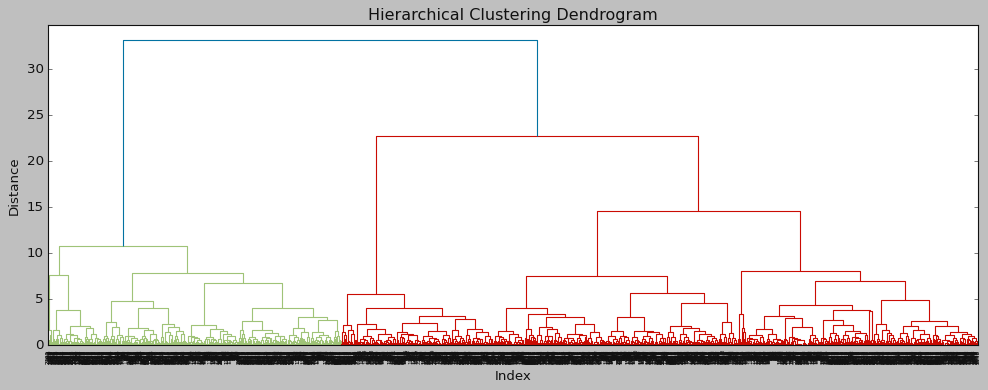

In [ ]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
#p = np.array(df_norm) # converting into numpy array format
z = linkage(df_norm, method="ward",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=4, linkage='ward',affinity = "euclidean").fit(df_norm)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df4['clust']=cluster_labels # creating a  new column and assigning it to new column
df4

country  birth_rate  business_tax_rate   co2_emission  \
0                      Algeria    0.020000          48.966901   87931.000000   
1                       Angola    0.050000          48.966901    9542.000000   
2                        Benin    0.043000          48.966901    1617.000000   
3                     Botswana    0.027000          48.966901    4276.000000   
4                 Burkina Faso    0.046000          48.966901    1041.000000   
...                        ...         ...                ...            ...   
2699  Turks and Caicos Islands    0.022715          48.966901  142307.107765   
2700             United States    0.013000          46.400000  142307.107765   
2701                   Uruguay    0.015000          41.900000  142307.107765   
2702             Venezuela, RB    0.020000          61.900000  142307.107765   
2703     Virgin Islands (U.S.)    0.011000          48.966901  142307.107765   

      days_to_start_business  ease_of_business  energy_usage           GDP  \
0                  39.999418         94.875676  2.699800e+04  5.479006e+10   
1                  39.999418         94.875676  7.499000e+03  9.129595e+09   
2                  39.999418         94.875676  1.983000e+03  2.359122e+09   
3                  39.999418         94.875676  1.836000e+03  5.788312e+09   
4                  39.999418         94.875676  7.723684e+04  2.610959e+09   
...                      ...               ...           ...           ...   
2699               39.999418         94.875676  7.723684e+04  2.638540e+11   
2700                5.000000          4.000000  2.132446e+06  1.624460e+13   
2701                7.000000         85.000000  7.723684e+04  5.000435e+10   
2702              144.000000        180.000000  7.723684e+04  3.812862e+11   
2703               39.999418         94.875676  7.723684e+04  2.638540e+11   

      health_exp_percent_GDP  health_exp_percapita  ...  life_expectancy_male  \
0                    0.03500             60.000000  ...             67.000000   
1                    0.03400             22.000000  ...             44.000000   
2                    0.04300             15.000000  ...             53.000000   
3                    0.04700            152.000000  ...             49.000000   
4                    0.05100             12.000000  ...             49.000000   
...                      ...                   ...  ...                   ...   
2699                 0.06417            801.397077  ...             66.461838   
2700                 0.17900           8895.000000  ...             76.000000   
2701                 0.08900           1308.000000  ...             74.000000   
2702                 0.04600            593.000000  ...             72.000000   
2703                 0.06417            801.397077  ...             76.000000   

      mobile_phone_usage  population_0_14  population_15_64  \
0               0.000000         0.342000          0.619000   
1               0.000000         0.476000          0.499000   
2               0.000000         0.454000          0.517000   
3               0.100000         0.383000          0.587000   
4               0.000000         0.468000          0.505000   
...                  ...              ...               ...   
2699            0.578124         0.303051          0.623481   
2700            1.000000         0.196000          0.667000   
2701            1.500000         0.220000          0.639000   
2702            1.000000         0.288000          0.652000   
2703            0.578124         0.206000          0.641000   

      population_65_plus  population_total  population_urban  tourism_inbound  \
0               0.039000          31719449             0.599     1.020000e+08   
1               0.025000          13924930             0.324     3.400000e+07   
2               0.029000           6949366             0.383     7.700000e+07   
3               0.029000           1755375             0.532     2.2700

K-Means Clustering - Finding 'K' value by Elbow method

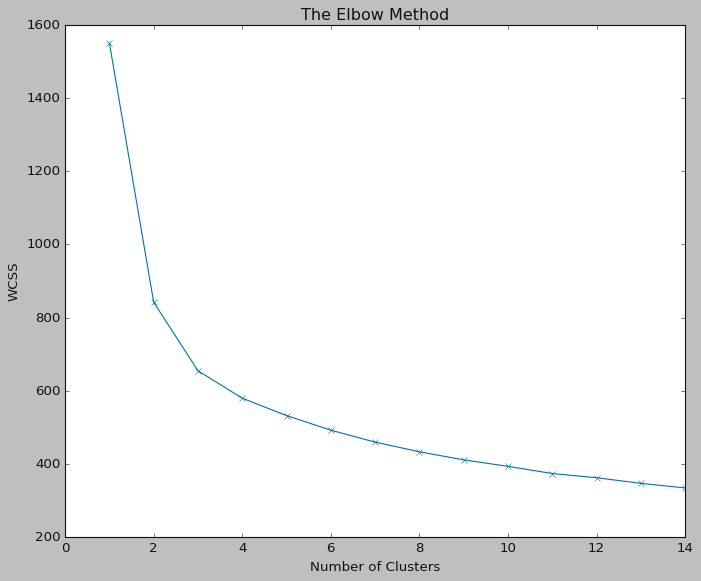

In [ ]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
range_val=range(1,15)
for i in range_val:
    KMean=KMeans(n_clusters=i)
    KMean.fit_predict(pd.DataFrame(df_norm))
    WCSS.append(KMean.inertia_) # inertia is another name for WCSS
plt.plot(range_val, WCSS,'bx-')
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

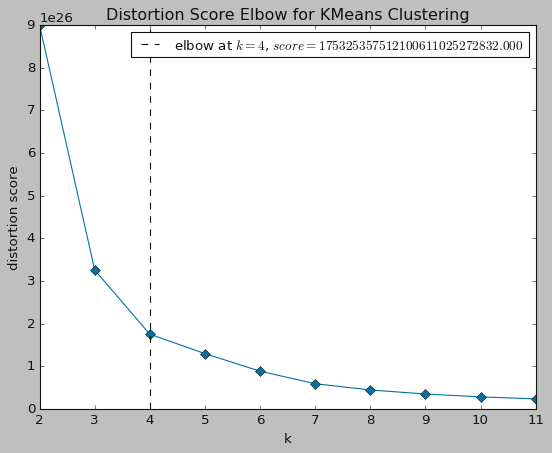

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model =KMeans(init='k-means++',random_state=8)
visualizer = KElbowVisualizer(model, k=(2,12), metric='distortion', timings=False)
visualizer.fit(df3)
visualizer.show()

**Model Building**

Model Building using KMeans

In [ ]:
Kmeans_model=KMeans(4)
Kmeans_model.fit_predict(df_norm)
pca_df_Kmeans=pd.concat([pca_df,pd.DataFrame({'cluster':Kmeans_model.labels_})],axis=1)

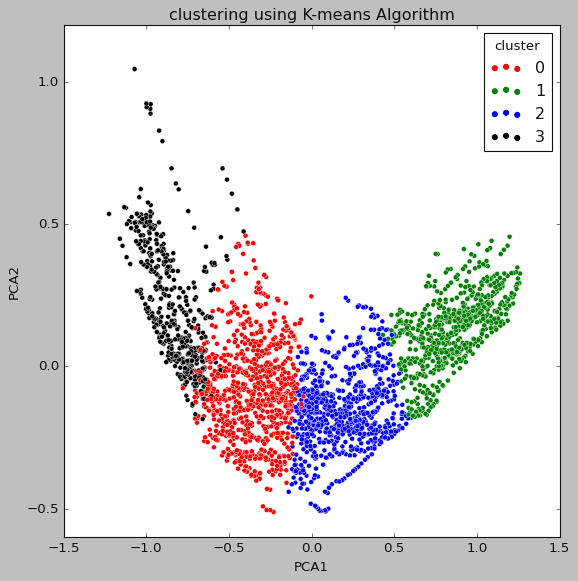

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_Kmeans,palette=['red','green','blue','black'])
plt.title("clustering using K-means Algorithm")
plt.show()

In [ ]:
# silhouette score
sil_score_kmeans= silhouette_score(pca_df_Kmeans, Kmeans_model.labels_)
print('silhouette score: ',sil_score_kmeans)

silhouette score:  0.7920921271551387


In [ ]:
#find all cluster centers
cluster_centers=pd.DataFrame(data=Kmeans_model.cluster_centers_,columns=[df3.columns])
cluster_centers

Birth Rate Business Tax Rate CO2 Emissions Days to Start Business  \
0   0.185203          0.114277      0.020114               0.055512   
1   0.697220          0.159187      0.003444               0.069072   
2   0.364995          0.113137      0.012136               0.062333   
3   0.098265          0.105833      0.039955               0.028677   

  Ease of Business Energy Usage       GDP Health Exp % GDP Health Exp/Capita  \
0         0.495392     0.029165  0.011316         0.251366          0.068963   
1         0.519566     0.017051  0.001319         0.238159          0.009300   
2         0.506797     0.019761  0.004896         0.223952          0.018585   
3         0.464912     0.057760  0.067589         0.364245          0.315812   

  Hours to do Tax  ... Life Expectancy Female Life Expectancy Male  \
0        0.122462  ...               0.792267             0.670766   
1        0.118755  ...               0.342313             0.318827   
2        0.110031  ...               0.675484             0.577738   
3        0.084693  ...               0.892358             0.767868   

  Mobile Phone Usage Population 0-14 Population 15-64 Population 65+  \
0           0.265034        0.322397         0.511799       0.354038   
1           0.072401        0.838418         0.149731       0.112898   
2           0.129797        0.569778         0.364699       0.196240   
3           0.371207        0.148515         0.533478       0.595078   

  Population Total Population Urban Tourism Inbound Tourism Outbound  
0         0.020404         0.670105        0.018826         0.025937  
1         0.012883         0.264948        0.005651         0.010857  
2         0.034991         0.424608        0.009453         0.012323  
3         0.024272         0.776608        0.090624         0.142432  

[4 rows x 23 columns]

In [ ]:
cluster_df=pd.concat([df4,pd.DataFrame({'cluster':Kmeans_model.labels_})],axis=1)
cluster_df

country  birth_rate  business_tax_rate   co2_emission  \
0                      Algeria    0.020000          48.966901   87931.000000   
1                       Angola    0.050000          48.966901    9542.000000   
2                        Benin    0.043000          48.966901    1617.000000   
3                     Botswana    0.027000          48.966901    4276.000000   
4                 Burkina Faso    0.046000          48.966901    1041.000000   
...                        ...         ...                ...            ...   
2699  Turks and Caicos Islands    0.022715          48.966901  142307.107765   
2700             United States    0.013000          46.400000  142307.107765   
2701                   Uruguay    0.015000          41.900000  142307.107765   
2702             Venezuela, RB    0.020000          61.900000  142307.107765   
2703     Virgin Islands (U.S.)    0.011000          48.966901  142307.107765   

      days_to_start_business  ease_of_business  energy_usage           GDP  \
0                  39.999418         94.875676  2.699800e+04  5.479006e+10   
1                  39.999418         94.875676  7.499000e+03  9.129595e+09   
2                  39.999418         94.875676  1.983000e+03  2.359122e+09   
3                  39.999418         94.875676  1.836000e+03  5.788312e+09   
4                  39.999418         94.875676  7.723684e+04  2.610959e+09   
...                      ...               ...           ...           ...   
2699               39.999418         94.875676  7.723684e+04  2.638540e+11   
2700                5.000000          4.000000  2.132446e+06  1.624460e+13   
2701                7.000000         85.000000  7.723684e+04  5.000435e+10   
2702              144.000000        180.000000  7.723684e+04  3.812862e+11   
2703               39.999418         94.875676  7.723684e+04  2.638540e+11   

      health_exp_percent_GDP  health_exp_percapita  ...  mobile_phone_usage  \
0                    0.03500             60.000000  ...            0.000000   
1                    0.03400             22.000000  ...            0.000000   
2                    0.04300             15.000000  ...            0.000000   
3                    0.04700            152.000000  ...            0.100000   
4                    0.05100             12.000000  ...            0.000000   
...                      ...                   ...  ...                 ...   
2699                 0.06417            801.397077  ...            0.578124   
2700                 0.17900           8895.000000  ...            1.000000   
2701                 0.08900           1308.000000  ...            1.500000   
2702                 0.04600            593.000000  ...            1.000000   
2703                 0.06417            801.397077  ...            0.578124   

      population_0_14  population_15_64  population_65_plus  population_total  \
0            0.342000          0.619000            0.039000          31719449   
1            0.476000          0.499000            0.025000          13924930   
2            0.454000          0.517000            0.029000           6949366   
3            0.383000          0.587000            0.029000           1755375   
4            0.468000          0.505000            0.028000          11607944   
...               ...               ...                 ...               ...   
2699         0.303051          0.623481            0.073465             32427   
2700         0.196000          0.667000            0.136000         313873685   
2701         0.220000          0.639000            0.140000           3395253   
2702         0.288000          0.652000            0.060000          29954782   
2703         0.206000          0.641000            0.152000            105275   

      population_urban  tourism_inbound  tourism_outbound  clust  cluster  
0                0.599     1.020000e+08      1.930000e+08      3        2  
1                0.324     3.400000e+07      1.4600

In [ ]:
cluster_1_df = cluster_df[cluster_df["cluster"]==0]
cluster_1_df

country  birth_rate  business_tax_rate   co2_emission  \
54                     Armenia    0.013000          48.966901    3465.000000   
61                     Georgia    0.012000          48.966901    4536.000000   
62        Hong Kong SAR, China    0.008000          48.966901   40465.000000   
67            Korea, Dem. Rep.    0.018000          48.966901   76699.000000   
68                 Korea, Rep.    0.013000          48.966901  447561.000000   
...                        ...         ...                ...            ...   
2697                  Suriname    0.018000          27.900000  142307.107765   
2698       Trinidad and Tobago    0.015000          29.100000  142307.107765   
2699  Turks and Caicos Islands    0.022715          48.966901  142307.107765   
2702             Venezuela, RB    0.020000          61.900000  142307.107765   
2703     Virgin Islands (U.S.)    0.011000          48.966901  142307.107765   

      days_to_start_business  ease_of_business   energy_usage           GDP  \
54                 39.999418         94.875676    2015.000000  1.911564e+09   
61                 39.999418         94.875676    2869.000000  3.057453e+09   
62                 39.999418         94.875676   13392.000000  1.716682e+11   
67                 39.999418         94.875676   19717.000000  2.638540e+11   
68                 39.999418         94.875676  188161.000000  5.616330e+11   
...                      ...               ...            ...           ...   
2697              694.000000        165.000000   77236.840896  5.012121e+09   
2698               41.000000         63.000000   77236.840896  2.343634e+10   
2699               39.999418         94.875676   77236.840896  2.638540e+11   
2702              144.000000        180.000000   77236.840896  3.812862e+11   
2703               39.999418         94.875676   77236.840896  2.638540e+11   

      health_exp_percent_GDP  health_exp_percapita  ...  mobile_phone_usage  \
54                   0.06300             39.000000  ...            0.000000   
61                   0.06900             45.000000  ...            0.000000   
62                   0.06417            801.397077  ...            0.800000   
67                   0.06417            801.397077  ...            0.578124   
68                   0.04300            491.000000  ...            0.600000   
...                      ...                   ...  ...                 ...   
2697                 0.05900            521.000000  ...            1.100000   
2698                 0.05400            972.000000  ...            1.400000   
2699                 0.06417            801.397077  ...            0.578124   
2702                 0.04600            593.000000  ...            1.000000   
2703                 0.06417            801.397077  ...            0.578124   

      population_0_14  population_15_64  population_65_plus  population_total  \
54           0.259000          0.641000            0.100000           3076098   
61           0.219000          0.656000            0.125000           4418300   
62           0.173000          0.717000            0.110000           6665000   
67           0.260000          0.681000            0.059000          22840225   
68           0.210000          0.717000            0.073000          47008111   
...               ...               ...                 ...               ...   
2697         0.278000          0.656000            0.066000            534541   
2698         0.207000          0.705000            0.088000           1337439   
2699         0.303051          0.623481            0.073465             32427   
2702         0.288000          0.652000            0.060000          29954782   
2703         0.206000          0.641000            0.152000            105275   

      population_urban  tourism_inbound  tourism_outbound  clust  cluster  
54               0.647     5.200000e+07      5.600000e+07      0        0  
61               0.526     1.070000e+08

In [ ]:
cluster_2_df = cluster_df[cluster_df["cluster"]==1]
cluster_2_df

country  birth_rate  business_tax_rate   co2_emission  \
1               Angola       0.050          48.966901    9542.000000   
2                Benin       0.043          48.966901    1617.000000   
3             Botswana       0.027          48.966901    4276.000000   
4         Burkina Faso       0.046          48.966901    1041.000000   
5              Burundi       0.042          48.966901     301.000000   
...                ...         ...                ...            ...   
2547            Zambia       0.043          15.100000  142307.107765   
2548          Zimbabwe       0.032          34.500000  142307.107765   
2549       Afghanistan       0.035          36.300000  142307.107765   
2579       Timor-Leste       0.036          11.000000  142307.107765   
2654  Papua New Guinea       0.029          42.100000  142307.107765   

      days_to_start_business  ease_of_business  energy_usage           GDP  \
1                  39.999418         94.875676   7499.000000  9.129595e+09   
2                  39.999418         94.875676   1983.000000  2.359122e+09   
3                  39.999418         94.875676   1836.000000  5.788312e+09   
4                  39.999418         94.875676  77236.840896  2.610959e+09   
5                  39.999418         94.875676  77236.840896  8.704861e+08   
...                      ...               ...           ...           ...   
2547               17.000000         90.000000  77236.840896  2.059642e+10   
2548               90.000000        168.000000  77236.840896  1.247242e+10   
2549                7.000000        170.000000  77236.840896  2.050680e+10   
2579               94.000000        167.000000  77236.840896  1.355000e+09   
2654               53.000000        108.000000  77236.840896  1.565392e+10   

      health_exp_percent_GDP  health_exp_percapita  ...  mobile_phone_usage  \
1                    0.03400             22.000000  ...                 0.0   
2                    0.04300             15.000000  ...                 0.0   
3                    0.04700            152.000000  ...                 0.1   
4                    0.05100             12.000000  ...                 0.0   
5                    0.06300              7.000000  ...                 0.0   
...                      ...                   ...  ...                 ...   
2547                 0.06500             96.000000  ...                 0.7   
2548                 0.06417            801.397077  ...                 0.9   
2549                 0.08600             51.000000  ...                 0.7   
2579                 0.04300             50.000000  ...                 0.6   
2654                 0.05200            114.000000  ...                 0.4   

      population_0_14  population_15_64  population_65_plus  population_total  \
1               0.476             0.499               0.025          13924930   
2               0.454             0.517               0.029           6949366   
3               0.383             0.587               0.029           1755375   
4               0.468             0.505               0.028          11607944   
5               0.490             0.481               0.029           6674286   
...               ...               ...                 ...               ...   
2547            0.467             0.506               0.026          14075099   
2548            0.402             0.558               0.039          13724317   
2549            0.474             0.503               0.023          29824536   
2579            0.463             0.505               0.032           1148958   
2654            0.384             0.588               0.029           7167010   

      population_urban  tourism_inbound  tourism_outbound  clust  cluster  
1                0.324     3.400000e+07      1.460000e+08      2        1  
2                0.383     7.700000e+07      5.000000e+07      2        1  
3                0.532     2.270000e+08      2.090000e+08      

In [ ]:
cluster_3_df = cluster_df[cluster_df["cluster"]==2]
cluster_3_df

country  birth_rate  business_tax_rate   co2_emission  \
0              Algeria       0.020          48.966901   87931.000000   
14    Egypt, Arab Rep.       0.025          48.966901  141326.000000   
26               Libya       0.022          48.966901   47114.000000   
31           Mauritius       0.017          48.966901    2769.000000   
32             Morocco       0.022          48.966901   33905.000000   
...                ...         ...                ...            ...   
2682            Guyana       0.021          35.900000  142307.107765   
2683             Haiti       0.026          40.400000  142307.107765   
2684          Honduras       0.026          40.000000  142307.107765   
2687         Nicaragua       0.023          64.900000  142307.107765   
2689          Paraguay       0.024          35.000000  142307.107765   

      days_to_start_business  ease_of_business  energy_usage           GDP  \
0                  39.999418         94.875676  26998.000000  5.479006e+10   
14                 39.999418         94.875676  40658.000000  9.983854e+10   
26                 39.999418         94.875676  15901.000000  3.389660e+10   
31                 39.999418         94.875676  77236.840896  4.582562e+09   
32                 39.999418         94.875676  10238.000000  3.702061e+10   
...                      ...               ...           ...           ...   
2682               20.000000        113.000000  77236.840896  2.851154e+09   
2683              105.000000        177.000000  77236.840896  7.890217e+09   
2684               14.000000        125.000000  77236.840896  1.856426e+10   
2687               39.000000        123.000000  77236.840896  1.064497e+10   
2689               35.000000        107.000000  77236.840896  2.461104e+10   

      health_exp_percent_GDP  health_exp_percapita  ...  mobile_phone_usage  \
0                      0.035                  60.0  ...                 0.0   
14                     0.054                  79.0  ...                 0.0   
26                     0.034                 252.0  ...                 0.0   
31                     0.037                 146.0  ...                 0.2   
32                     0.042                  54.0  ...                 0.1   
...                      ...                   ...  ...                 ...   
2682                   0.066                 235.0  ...                 0.7   
2683                   0.064                  53.0  ...                 0.6   
2684                   0.086                 195.0  ...                 0.9   
2687                   0.082                 144.0  ...                 1.0   
2689                   0.103                 392.0  ...                 1.0   

      population_0_14  population_15_64  population_65_plus  population_total  \
0               0.342             0.619               0.039          31719449   
14              0.354             0.592               0.053          66136590   
26              0.333             0.628               0.039           5176185   
31              0.258             0.681               0.061           1186873   
32              0.341             0.613               0.047          28710123   
...               ...               ...                 ...               ...   
2682            0.368             0.599               0.033            795369   
2683            0.354             0.601               0.045          10173775   
2684            0.357             0.599               0.044           7935846   
2687            0.334             0.620               0.046           5991733   
2689            0.328             0.619               0.054           6687361   

      population_urban  tourism_inbound  tourism_outbound  clust  cluster  
0                0.599     1.020000e+08      1.930000e+08      3        2  
14               0.428     4.657000e+09      1.206000e+09      3        2  
26               0.763     8.400000e+07      4.950000e+08      

In [ ]:
cluster_4_df = cluster_df[cluster_df["cluster"]==3]
cluster_4_df

country  birth_rate  business_tax_rate  co2_emission  \
65            Japan       0.009          48.966901  1.219589e+06   
89          Austria       0.010          48.966901  6.369600e+04   
91          Belgium       0.011          48.966901  1.157090e+05   
97          Denmark       0.013          48.966901  4.726000e+04   
100         Finland       0.011          48.966901  5.214100e+04   
...             ...         ...                ...           ...   
2668         Canada       0.011          24.600000  1.423071e+05   
2670          Chile       0.014          27.700000  1.423071e+05   
2691    Puerto Rico       0.011          50.700000  1.423071e+05   
2700  United States       0.013          46.400000  1.423071e+05   
2701        Uruguay       0.015          41.900000  1.423071e+05   

      days_to_start_business  ease_of_business  energy_usage           GDP  \
65                 39.999418         94.875676  5.189640e+05  4.731199e+12   
89                 39.999418         94.875676  2.855800e+04  1.920707e+11   
91                 39.999418         94.875676  5.850800e+04  2.326727e+11   
97                 39.999418         94.875676  1.863400e+04  1.600825e+11   
100                39.999418         94.875676  3.223300e+04  1.217938e+11   
...                      ...               ...           ...           ...   
2668                5.000000         17.000000  2.526510e+05  1.821445e+12   
2670                8.000000         34.000000  3.272000e+04  2.662593e+11   
2691                6.000000         37.000000  7.723684e+04  1.010807e+11   
2700                5.000000          4.000000  2.132446e+06  1.624460e+13   
2701                7.000000         85.000000  7.723684e+04  5.000435e+10   

      health_exp_percent_GDP  health_exp_percapita  ...  mobile_phone_usage  \
65                   0.07600           2834.000000  ...                 0.5   
89                   0.10000           2403.000000  ...                 0.8   
91                   0.08100           1845.000000  ...                 0.5   
97                   0.08700           2613.000000  ...                 0.6   
100                  0.07200           1700.000000  ...                 0.7   
...                      ...                   ...  ...                 ...   
2668                 0.10900           5741.000000  ...                 0.8   
2670                 0.07200           1103.000000  ...                 1.4   
2691                 0.06417            801.397077  ...                 0.8   
2700                 0.17900           8895.000000  ...                 1.0   
2701                 0.08900           1308.000000  ...                 1.5   

      population_0_14  population_15_64  population_65_plus  population_total  \
65              0.146             0.682               0.172         126870000   
89              0.170             0.675               0.155           8011566   
91              0.176             0.655               0.169          10251250   
97              0.185             0.667               0.149           5339616   
100             0.182             0.669               0.149           5176209   
...               ...               ...                 ...               ...   
2668            0.164             0.688               0.148          34754312   
2670            0.214             0.689               0.097          17464814   
2691            0.198             0.667               0.135           3651545   
2700            0.196             0.667               0.136         313873685   
2701            0.220             0.639               0.140           3395253   

      population_urban  tourism_inbound  tourism_outbound  clust  cluster  
65               0.786     5.970000e+09      4.264300e+10      0        3  
89               0.658     1.138200e+10      7.001000e+09      0        3  
91               0.971     6.592000e+09      9.429000e+09      0        3  
97               0.851     3.671

<Axes: xlabel='cluster', ylabel='count'>

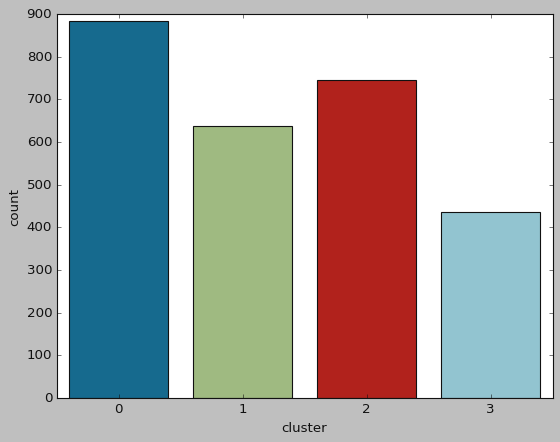

In [ ]:
#visualization
sns.countplot(x='cluster',data=cluster_df)

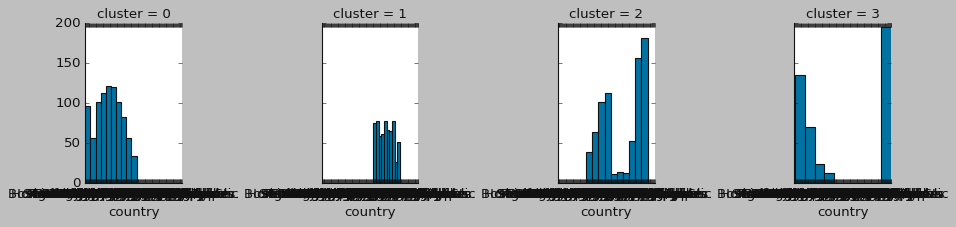

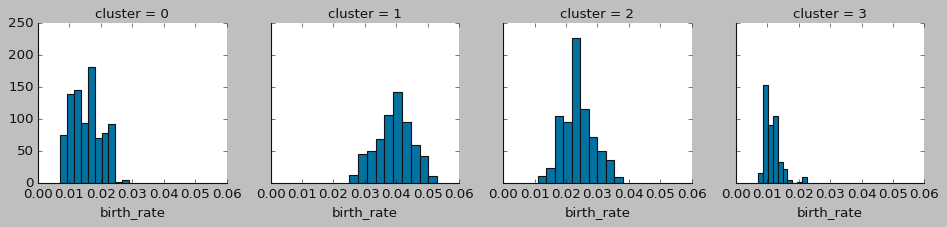

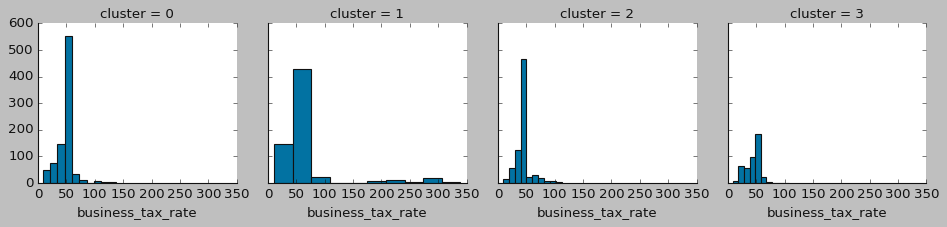

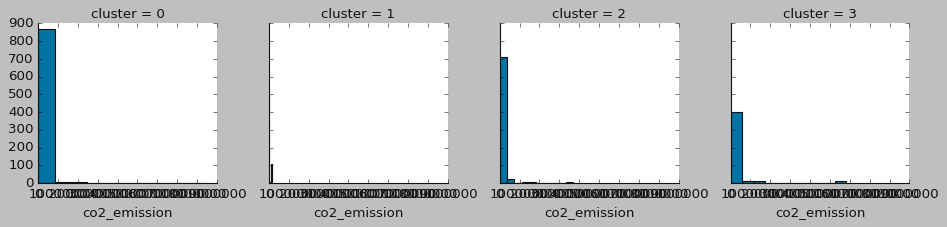

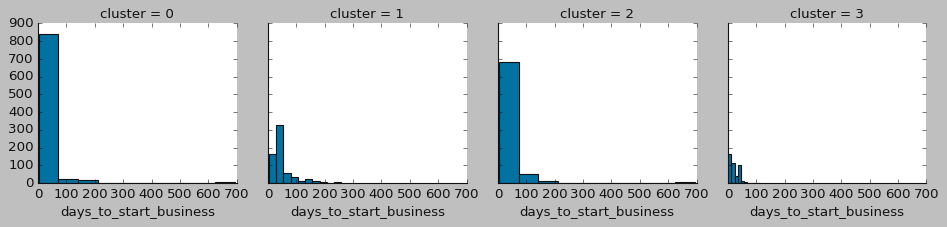

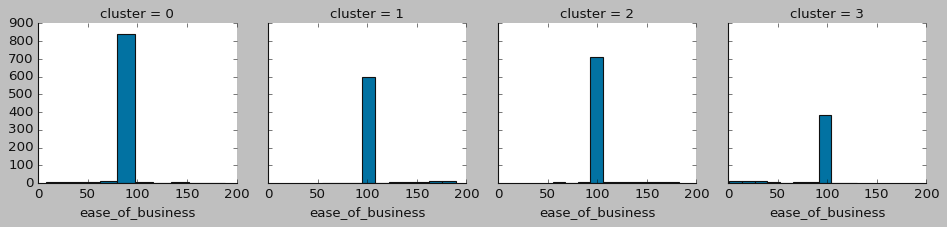

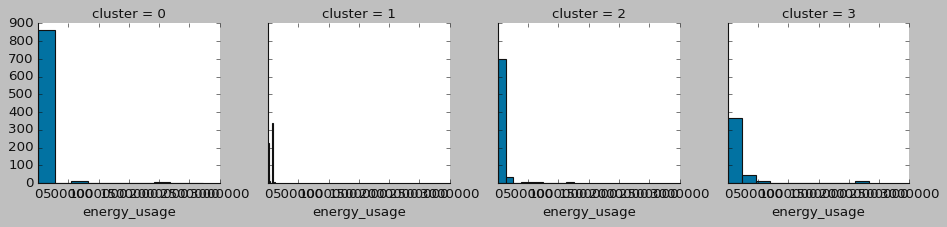

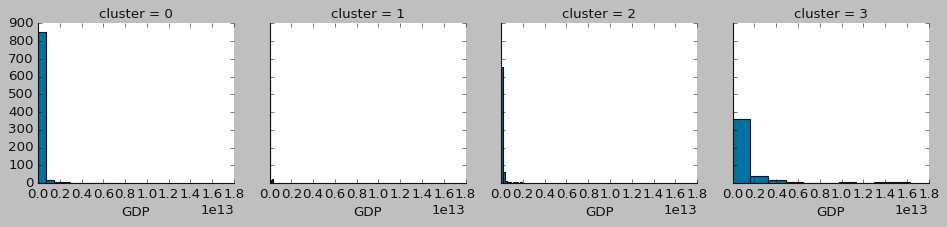

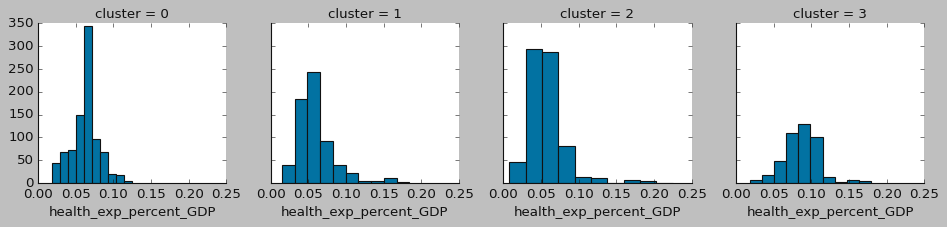

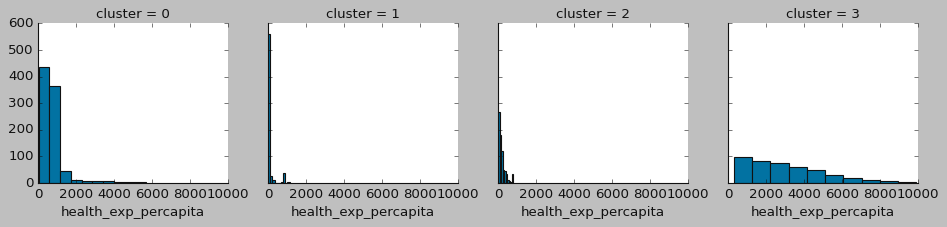

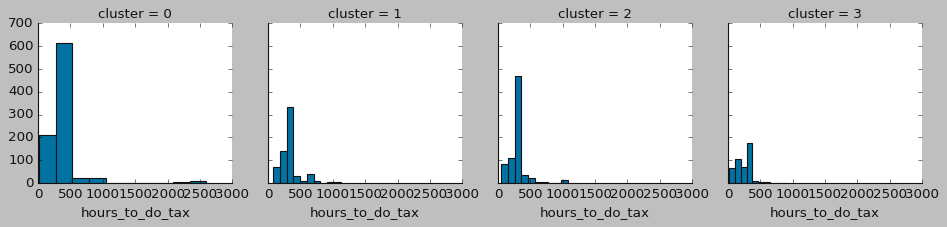

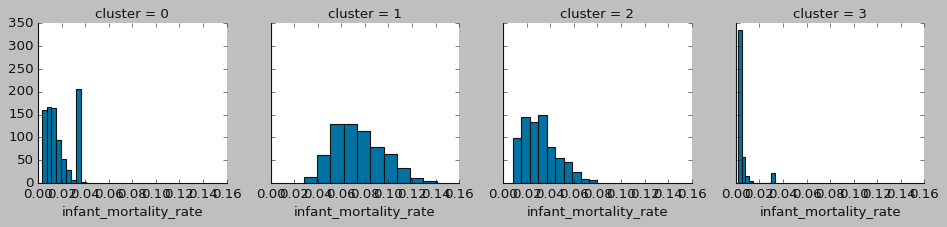

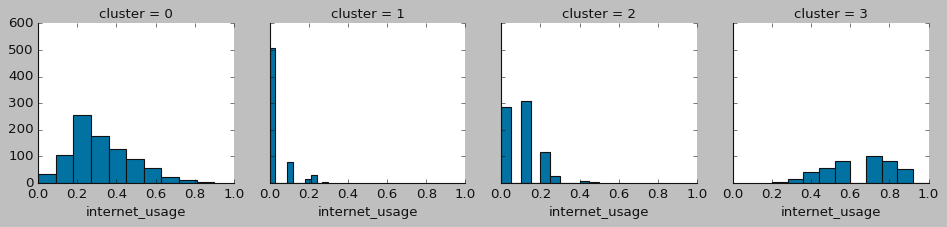

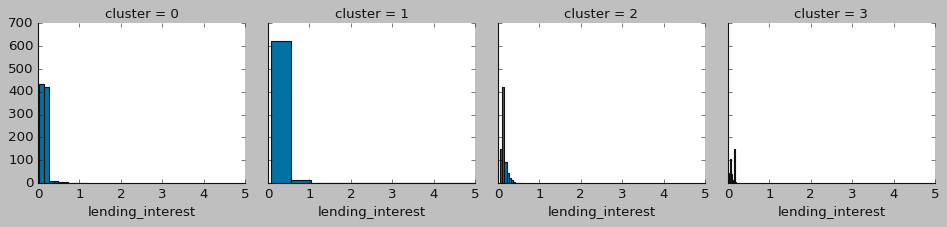

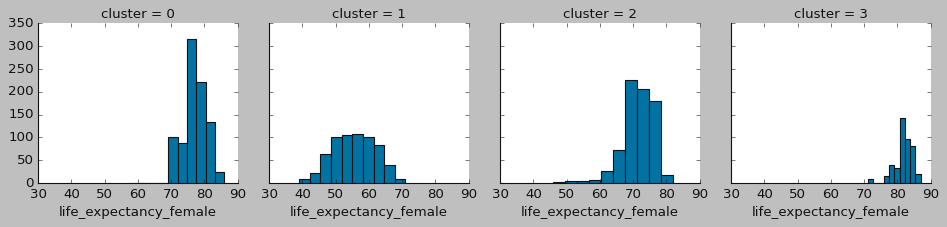

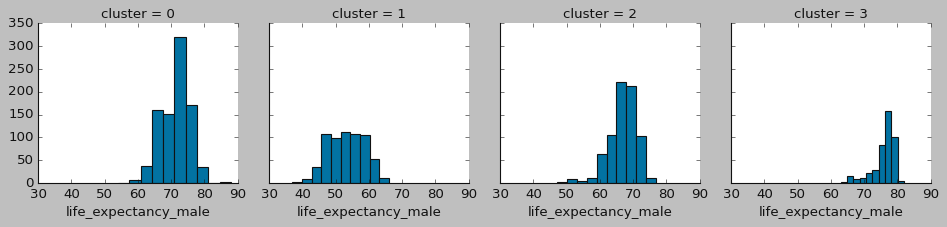

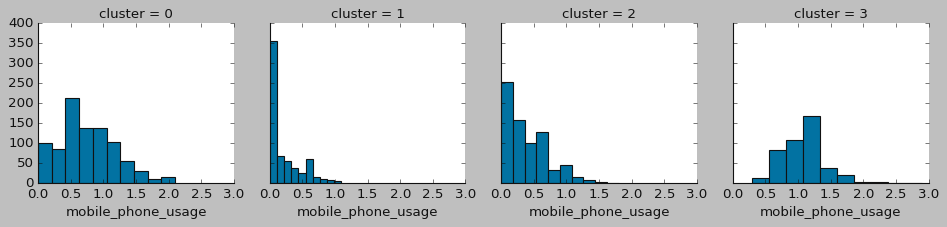

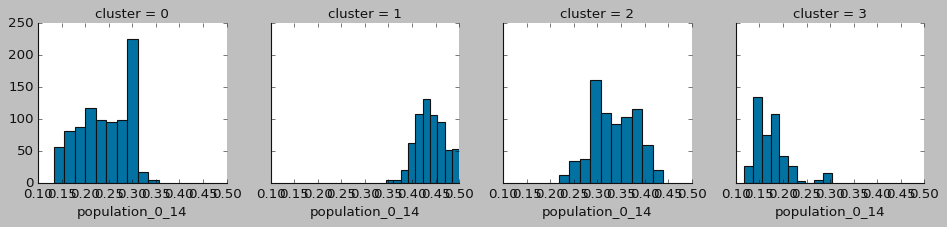

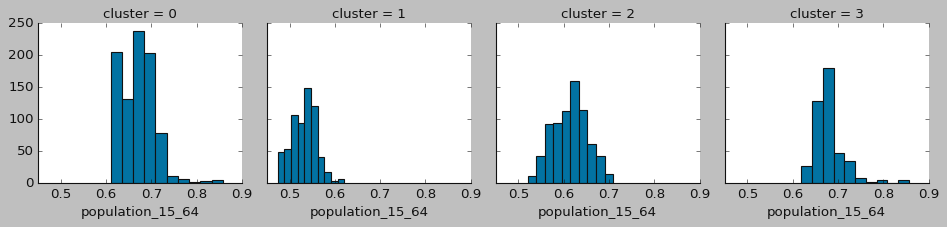

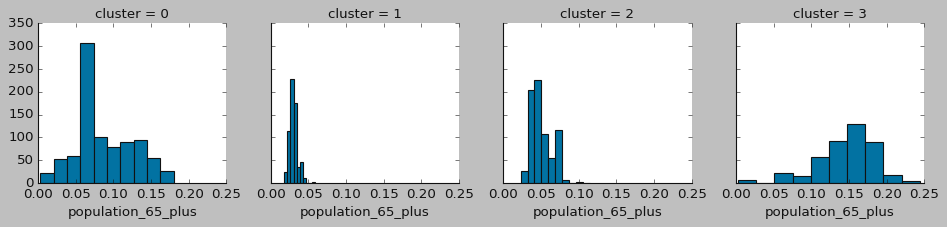

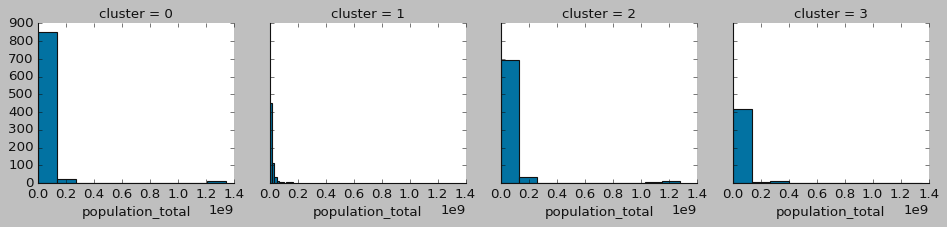

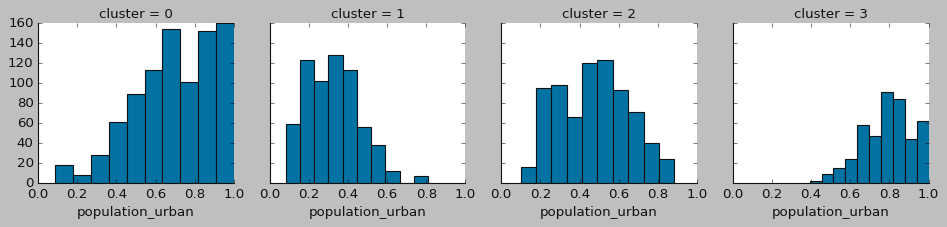

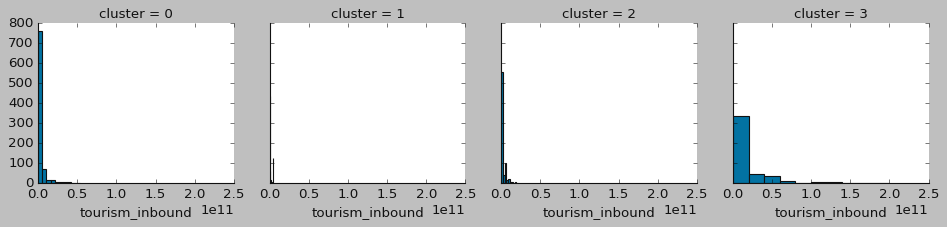

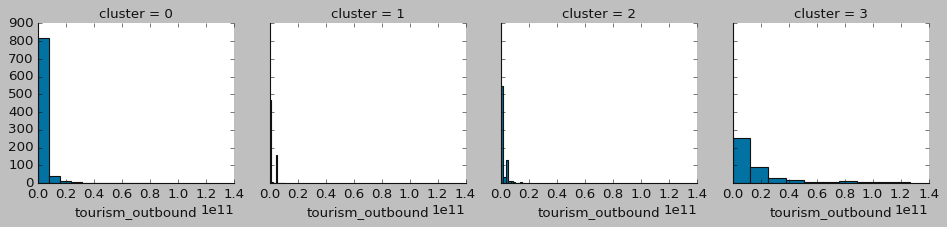

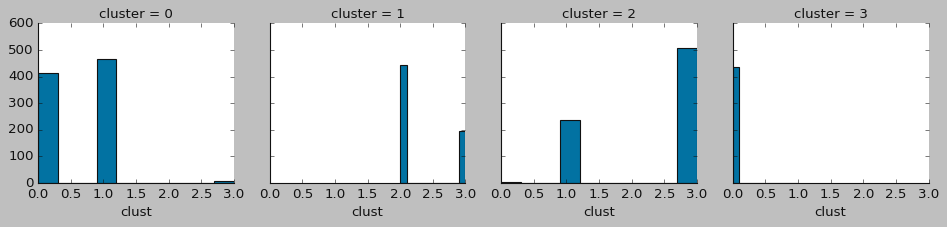

In [ ]:
for c in cluster_df.drop(['cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='cluster')
    grid= grid.map(plt.hist, c)
plt.show()

DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=48)
nbrs = neigh.fit(df_norm)
distances, indices = nbrs.kneighbors(df_norm)

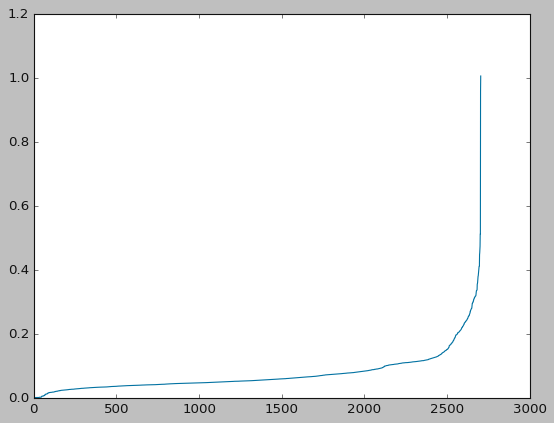

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
dbscan = DBSCAN(eps=0.25, min_samples=19)
dbscan.fit(df_norm)

DBSCAN(eps=0.25, min_samples=19)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0,  0,  0, ..., -1, -1,  0])

In [ ]:
dl = dbscan.labels_

In [ ]:
import sklearn
sklearn.metrics.silhouette_score(df_norm, dl)

0.08285429067735868

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=25)
dbscan.fit(df_norm)

DBSCAN(eps=0.3, min_samples=25)

In [ ]:
dbscan.labels_

array([ 0,  0,  0, ...,  0, -1,  0])

In [ ]:
dl1 = dbscan.labels_

In [ ]:
import sklearn
sklearn.metrics.silhouette_score(df_norm, dl1)

0.1534993930204612

In [ ]:
dbscan = DBSCAN(eps=0.35, min_samples=20)
dbscan.fit(df_norm)

DBSCAN(eps=0.35, min_samples=20)

In [ ]:
dbscan.labels_

array([ 0,  0,  0, ...,  0, -1,  0])

In [ ]:
dl2 = dbscan.labels_

In [ ]:
import sklearn
sklearn.metrics.silhouette_score(df_norm, dl2)

0.2298579088238481

saving the Kmeans clustering model and the data with cluster label

In [ ]:
#saving scikilearn models
import joblib
joblib.dump(Kmeans_model,"Kmeans_model.pkl")

['Kmeans_model.pkl']

In [ ]:
cluster_df.to_excel("clustered_World_development_mesurement.xlsx")

training and testing the model accuracy

In [ ]:
#split Dataset
X=cluster_df.drop(['cluster','country','clust'],axis=1)
# X =X[~X.isin([np.nan, np.inf, -np.inf]).any(1)]
# X.replace([np.inf, -np.inf], np.nan, inplace=True)
# new_X = X[np.isfinite(X).all(1)]
Y=cluster_df[['cluster']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1892, 23)
(1892, 1)
(812, 23)
(812, 1)


In [ ]:
X_train

birth_rate  business_tax_rate  co2_emission  days_to_start_business  \
838        0.041          48.966901        3957.0               45.000000   
1269       0.040          80.700000        1181.0               40.000000   
1422       0.015          25.100000       64393.0               27.000000   
1175       0.019          48.966901       19208.0               39.999418   
73         0.025          48.966901         499.0               39.999418   
...          ...                ...           ...                     ...   
1032       0.018          48.966901         194.0               39.999418   
2121       0.038         235.200000         689.0               12.000000   
1424       0.017          55.200000        7437.0               77.000000   
1725       0.014          38.600000        6238.0                3.000000   
2254       0.014          24.500000       72258.0               22.000000   

      ease_of_business  energy_usage           GDP  health_exp_percent_GDP  \
838          94.875676   6959.000000  1.577536e+10                   0.046   
1269         94.875676  77236.840896  2.821347e+09                   0.055   
1422         94.875676  29507.000000  1.546710e+11                   0.062   
1175         94.875676   7332.000000  1.596915e+10                   0.037   
73           94.875676  77236.840896  6.243371e+08                   0.071   
...                ...           ...           ...                     ...   
1032         94.875676     66.000000  5.225447e+08                   0.037   
2121         94.875676  77236.840896  2.578159e+09                   0.154   
1424         94.875676   4182.000000  2.252646e+10                   0.078   
1725         94.875676   3005.000000  1.279934e+10                   0.090   
2254         94.875676  30920.000000  2.175019e+11                   0.071   

      health_exp_percapita  hours_to_do_tax  ...  life_expectancy_female  \
838                   41.0       302.068503  ...                    53.0   
1269                  16.0       416.000000  ...                    54.0   
1422                 587.0       316.000000  ...                    81.0   
1175                 573.0       302.068503  ...                    76.0   
73                   162.0       302.068503  ...                    70.0   
...                    ...              ...  ...                     ...   
1032                 179.0       302.068503  ...                    73.0   
2121                  69.0       357.000000  ...                    45.0   
1424                 410.0       402.000000  ...                    81.0   
1725                 261.0       387.000000  ...                    77.0   
2254                 894.0       316.000000  ...                    82.0   

      life_expectancy_male  mobile_phone_usage  population_0_14  \
838                   51.0            0.100000            0.445   
1269                  53.0            0.578124            0.435   
1422                  75.0            0.800000            0.243   
1175                  75.0            0.900000            0.269   
73                    69.0            0.000000            0.413   
...                    ...                 ...              ...   
1032                  69.0            0.700000            0.290   
2121                  45.0            0.300000            0.422   
1424                  76.0            0.300000            0.272   
1725                  70.0            0.600000            0.174   
2254                  76.0            1.200000            0.221   

      population_15_64  population_65_plus  population_total  \
838              0.522               0.033          17674960   
1269             0.533               0.032           9798963   
1422             0.675               0.082          16504530   
1175             0.709               0.022            879534   
73               0.549               0.038            272745   
...                ...                 ...

In [ ]:
X_test

birth_rate  business_tax_rate   co2_emission  days_to_start_business  \
173     0.022715          48.966901     455.000000               39.999418   
177     0.013000          48.966901   26039.000000               39.999418   
606     0.023000          48.966901  391251.000000               39.999418   
2498    0.037000          65.900000  142307.107765               26.000000   
958     0.011000          48.966901  142307.107765               56.000000   
...          ...                ...            ...                     ...   
70      0.031000          48.966901     972.000000               39.999418   
678     0.014000          48.966901    3429.000000               18.000000   
1568    0.010000          46.200000   15137.000000               26.000000   
1818    0.022715          64.800000      99.000000               17.000000   
1263    0.038000          44.100000    4752.000000              135.000000   

      ease_of_business   energy_usage           GDP  health_exp_percent_GDP  \
173          94.875676   77236.840896  2.638540e+11                 0.06417   
177          94.875676   12859.000000  3.056520e+10                 0.06100   
606          94.875676  150843.000000  7.415595e+11                 0.05600   
2498        175.000000   77236.840896  7.543184e+09                 0.04500   
958          94.875676   18094.000000  2.364985e+10                 0.08700   
...                ...            ...           ...                     ...   
70           94.875676   77236.840896  1.731198e+09                 0.03300   
678          94.875676    1981.000000  2.807061e+09                 0.05600   
1568         94.875676    9460.000000  3.932599e+10                 0.06200   
1818         94.875676   77236.840896  1.525658e+08                 0.17900   
1263         94.875676    1503.000000  8.081982e+09                 0.02300   

      health_exp_percapita  hours_to_do_tax  ...  life_expectancy_female  \
173             801.397077       302.068503  ...               71.159268   
177             166.000000       302.068503  ...               79.000000   
606             396.000000       302.068503  ...               77.000000   
2498             33.000000       270.000000  ...               61.000000   
958             204.000000       302.068503  ...               75.000000   
...                    ...              ...  ...                     ...   
70               11.000000       302.068503  ...               63.000000   
678              51.000000       302.068503  ...               76.000000   
1568            725.000000       166.000000  ...               77.000000   
1818            569.000000       128.000000  ...               71.159268   
1263            287.000000       492.000000  ...               51.000000   

      life_expectancy_male  mobile_phone_usage  population_0_14  \
173              66.461838            0.300000         0.303051   
177              75.000000            0.000000         0.216000   
606              72.000000            0.200000         0.334000   
2498             58.000000            0.800000         0.430000   
958              70.000000            0.500000         0.185000   
...                    ...                 ...              ...   
70               60.000000            0.000000         0.435000   
678              69.000000            0.000000         0.233000   
1568             65.000000            1.500000         0.159000   
1818             66.461838            0.578124         0.303051   
1263             48.000000            0.200000         0.403000   

      population_15_64  population_65_plus  population_total  \
173           0.623481            0.073465             41685   
177           0.685000            0.099000          11138416   
606           0.615000            0.051000         106723661   
2498          0.542000            0.029000          10050702   
958           0.676000            0.139000           7463157   
...               

In [ ]:
#Decision_Tree
model1=DecisionTreeClassifier(criterion="entropy")
model1.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

In [ ]:
#Confusion_Matrix
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.metrics as metrics
print("Confusion Matrix")
print("____________________")
print(metrics.confusion_matrix(Y_test, Y_pred))
print("####################################################")
print("Classification Report")
print("______________________")
print(classification_report(Y_test, Y_pred))

Confusion Matrix
____________________
[[242   0   4   2]
 [  0 189   6   0]
 [  5   5 220   0]
 [ 12   0   0 127]]
####################################################
Classification Report
______________________
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       248
           1       0.97      0.97      0.97       195
           2       0.96      0.96      0.96       230
           3       0.98      0.91      0.95       139

    accuracy                           0.96       812
   macro avg       0.96      0.95      0.96       812
weighted avg       0.96      0.96      0.96       812



In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest
model2=RandomForestClassifier(criterion="entropy")
model2.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

In [ ]:
#Confusion_Matrix
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.metrics as metrics
print("Confusion Matrix")
print("____________________")
print(metrics.confusion_matrix(Y_test, Y_pred))
print("####################################################")
print("Classification Report")
print("______________________")
print(classification_report(Y_test, Y_pred))

Confusion Matrix
____________________
[[242   0   4   2]
 [  0 189   6   0]
 [  5   5 220   0]
 [ 12   0   0 127]]
####################################################
Classification Report
______________________
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       248
           1       0.97      0.97      0.97       195
           2       0.96      0.96      0.96       230
           3       0.98      0.91      0.95       139

    accuracy                           0.96       812
   macro avg       0.96      0.95      0.96       812
weighted avg       0.96      0.96      0.96       812



saving the Random Forest model for future prediction

In [ ]:
import pickle
from pickle import dump,load
filename = 'world_model.pkl'
pickle.dump(model2, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb')) # this line will load data to file name
result = loaded_model.score(X_test, Y_test)
print(result,'% Acuuracy')

0.9568965517241379 % Acuuracy


**Deployment**

In [ ]:
# installing streamlit library
!pip install -q streamlit

In [ ]:
%%writefile cluster_deploy.py
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.ensemble import RandomForestClassifier
from pickle import load

st.title('Prediction on Global Development Measurement')

st.sidebar.header('User Input Parameters')

def user_input_features():
    birth_rate = st.sidebar.number_input("Birth Rate")
    business_tax_rate = st.sidebar.number_input("Business Tax Rate",max_value=60.00)
    co2_emission = st.sidebar.number_input('CO2 Emissions',min_value=0.000 )
    days_to_start_business = st.sidebar.number_input('No. of Days to Start Business',max_value=80.00)
    ease_of_business = st.sidebar.number_input('Ease of Business',max_value=80.00)
    energy_usage = st.sidebar.number_input('Energy Usage',min_value=0.000)
    GDP = st.sidebar.number_input('GDP ($)',min_value=0.000)
    health_exp_percent_GDP = st.sidebar.number_input('Health Exp % GDP value')
    health_exp_percapita = st.sidebar.number_input('Health Exp/Capita',min_value=0.000)
    hours_to_do_tax = st.sidebar.number_input('Hours to do Tax',max_value=600.00)
    infant_mortality_rate = st.sidebar.number_input('Infant Mortality Rate')
    internet_usage = st.sidebar.number_input('Internet Usage duration')
    lending_interest = st.sidebar.number_input('Lending Interest rate')
    life_expectancy_female = st.sidebar.number_input('Life Expectancy Female')
    life_expectancy_male = st.sidebar.number_input('Life Expectancy Male')
    mobile_phone_usage = st.sidebar.number_input('Mobile Phone Usage duration')
    population_0_14 =  st.sidebar.number_input('Population between 0-14 Years')
    population_15_64 =  st.sidebar.number_input('Population between 15-64 Years')
    population_65_plus =  st.sidebar.number_input('Population between 65+ Years')
    population_total = st.sidebar.number_input('Population Total',min_value=0.000)
    population_urban = st.sidebar.number_input('Population Urban')
    tourism_inbound = st.sidebar.number_input('Tourism Inbound ($)',min_value=0.000)
    tourism_outbound = st.sidebar.number_input('Tourism Outbound ($)',min_value=0.000)
    country = st.sidebar.text_input(' enter country')

    data = {'birth_rate' : birth_rate, 'business_tax_rate' : business_tax_rate, 'co2_emission': co2_emission,
       'days_to_start_business' : days_to_start_business,'ease_of_business' : ease_of_business, 'energy_usage' : energy_usage,
       'GDP':GDP, 'health_exp_percent_GDP': health_exp_percent_GDP,'health_exp_percapita': health_exp_percapita,
       'hours_to_do_tax':hours_to_do_tax, 'infant_mortality_rate' : infant_mortality_rate, 'internet_usage':internet_usage,
       'lending_interest': lending_interest, 'life_expectancy_female':life_expectancy_female, 'life_expectancy_male':life_expectancy_male,
       'mobile_phone_usage' : mobile_phone_usage, 'population_0_14' : population_0_14 , 'population_15_64' : population_15_64 ,
       'population_65_plus' : population_65_plus , 'population_total' : population_total ,
       'population_urban' : population_urban, 'tourism_inbound' : tourism_inbound,'tourism_outbound': tourism_outbound,'country': country}

    features = pd.DataFrame(data,index = [0])
    features = features.drop(columns=['country'], axis=1)
    return features
df = user_input_features()
st.subheader('User Input parameters')
st.write(df)

# load the model from disk
loaded_model = load(open('world_model.pkl', 'rb'))
prediction = loaded_model.predict(df)
st.subheader('Predicted Result')


def analysis(prediction):
    if prediction == 0:
        return 'Developing Country'
    elif prediction == 1:
        return 'Under Developed Country'
    elif prediction == 2:
        return 'Developed Country'
    else:
        return 'Small Country'

# st.write(analysis(prediction))

if st.button("Predict"):
    st.write(analysis(prediction))

Overwriting cluster_deploy.py


In [ ]:
!pip install --upgrade protobuf

In [ ]:
!streamlit run /content/cluster_deploy.py & npx  localtunnel --port 8501 & curl ipv4.icanhazip.com

34.147.7.195
[..................] | fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.147.7.195:8501

npx: installed 22 in 5.697s
your url is: https://late-deer-create.loca.lt
